In [1]:
from astropy.io import fits
import glob
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from astropy.table import Table, Column
import math
#%matplotlib nbagg

# Display rootname and filter in a specified folder

In [32]:
os.chdir('/Users/mmckay/Desktop/wfc3_ir_distortion/tweakreg_test14/')
files = glob.glob('i*.fits')
for im in files:
    hdu = fits.open(im)
    filter_name = hdu[0].header['filter']
    rootname = hdu[0].header['rootname']
    aperture = hdu[0].header['APERTURE']
    #print(rootname,filter_name,aperture)
    hdu.close()
os.chdir('..')

In [39]:
working_dir = '/Users/mmckay/Desktop/wfc3_ir_distortion/tweakreg_test13/'


In [4]:
#Run TweakReg
os.chdir(working_dir)
from drizzlepac import tweakreg
from stsci.tools import teal
from stwcs import updatewcs

#updatewcs.updatewcs('*flt.fits')

refim = 'ibcj01ttq_flt.fits'

teal.unlearn('tweakreg')
findpars = {'computesig':True,
            'threshold':10.,
            'conv_width':2.5,
            'peakmin':100,
            'peakmax':30000.,
            'nsigma':1.5,
            'ratio':1.0, 
            'theta':0.0,
            'dqbits':None, 
            'use_sharp_round':False }

#ref_findpars = {'computesig':True,
#                'threshold':3.,
#                'conv_width':2.5,
#                'peakmin':5.,
#                'peakmax':,
#                'nsigma':1.5,
#                'ratio':1.0, 
#                'theta':0.0,
#                'dqbits':None,
#                'use_sharp_round':False}


tweakreg.TweakReg(glob.glob('*flt.fits'), 
                  expand_refcat=False, 
                  enforce_user_order=False,
                  updatehdr=False, 
                  shiftfile=True, 
                  writecat=True, 
                  clean=False, 
                  interactive= False, 
                  verbose=False,
                  headerlet=False, 
                  minobj=15, 
                  searchrad=1.0, 
                  searchunits='pixels', 
                  use2dhist=True, 
                  see2dplot=False,
                  separation=0.5, 
                  fitgeometry= 'general', 
                  residplot='both', 
                  labelsize=8,
                  nclip=5, 
                  sigma=3.0,
                  refimage=refim,
                  imagefindcfg=findpars, 
                  refimagefindcfg=findpars)

The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       imagefindpars           mapreg              photeq       
     pixreplace           pixtopix            pixtosky        refimagefindpars  
     resetbits          runastrodriz          skytopix           tweakback      
      tweakreg           updatenpol
Setting up logfile :  tweakreg.log

TweakReg Version 1.4.3(01-Jul-2016) started at: 10:22:58.687 (19/06/2018)

Version Information

--------------------

Python Version 3.6.1 |Continuum Analytics, Inc.| (default, May 11 2017, 13:04:09)
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]

numpy Version -> 1.14.0 

astropy Version -> 2.0 

stwcs Version -> 1.3.2 


Finding shifts for: 

    ibcj01u3q_flt.fits

    ibcj01u9q_flt.fits

    ibcj02dhq_flt.fits

    ibcj02drq_flt.fits

    ibcj02dxq_fl

In [85]:
%run ../ir_residual_plotting.py --path=/Users/mmckay/Desktop/wfc3_ir_distortion/tweakreg_test14/ --filter='F160W' --new_or_old_version=''


F160W


/Users/mmckay/miniconda3/envs/astroconda36/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W


# Linear fit using np.polyfit

In [40]:
def linear_fit(x,y,deg):
    popt, pcov = np.polyfit(x, y, deg, cov=True)
    slope=popt[0]
    y_intercept=popt[1]
    perr = np.sqrt(np.diag(pcov))
    slope_err=perr[0]
    y_intercept_err=perr[1]
    #print(perr)
    polyfit_data=slope * a + y_intercept
    print('slope= ',slope,'y-intercept= ',y_intercept,'slope_error= ',slope_err,'y_intercept_error=',y_intercept_err)
    
    return slope, y_intercept, slope_err, y_intercept_err, polyfit_data

# Plotting the X&Yscale vs time/PA_V3

# Change Date to Decimal Date function

In [4]:
from datetime import datetime as dt
import time

def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = dt(year=year, month=1, day=1)
    startOfNextYear = dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction

# Parameter Table of dataset
## All the following plots use data from this table!
## *Move the ref image to a seperate derectory for the correct naming in list

In [23]:
os.chdir('/Users/mmckay/Desktop/wfc3_ir_distortion/tweakreg_test13/')
#def parameters_text_files(path):
#os.system('mkdir refim')
#os.system('mv ibcj01ttq_flt.fits refim')
filename_list = []
file_date_list = []
decimal_date_list = []
x_rms_list = []
y_rms_list = []
x_shift_list = []
y_shift_list = []
x_scale_list = []
y_scale_list = []
plate_scale_list= []
stars_list = []
xy_rotation_list = []
va_factor_list = []
x_rotation_list = []
y_rotation_list = []
PA_V3_list = []
proposalID = []
Skew_list =[]
expstart_list =[]
expend_list =[]
postarg1_list = []
postarg2_list = []


#os.chdir(path)
infile = r"tweakreg.log"
os.system('pwd')
keep_phrases = ["<ROT>"]
with open(infile) as f:
    f = f.readlines()
for line in f:
    for phrase in keep_phrases:
        if phrase in line:
            Skew = line.split()[5]
            Skew=float(Skew)
            Skew_list.append(Skew)
            X_Rot=line.split()[7]
            Y_Rot=line.split()[9]
            X_Rot=X_Rot.replace(':','')
            X_Rot=float(X_Rot)
            x_rotation_list.append(X_Rot)
            Y_Rot=Y_Rot.replace(':','')
            Y_Rot=float(Y_Rot)
            y_rotation_list.append(Y_Rot)
            #print(X_Rot)
            #if X_Rot >= 300.00:
            #    X_Rot_deg = X_Rot - 360
            #    X_Rot_deg=math.radians(X_Rot_deg)
            #    x_rotation_list.append(X_Rot_deg)
            #elif X_Rot < 1:
            #    X_Rot = X_Rot
            #    X_Rot=math.radians(X_Rot)
            #    x_rotation_list.append(X_Rot)
            #if Y_Rot >= 300.00:
            #    Y_Rot_deg = Y_Rot - 360
            #    Y_Rot_deg=math.radians(Y_Rot_deg)
            #    y_rotation_list.append(Y_Rot_deg)
            #elif Y_Rot < 1:
            #    Y_Rot = Y_Rot
            #    Y_Rot=math.radians(Y_Rot)
            #    y_rotation_list.append(Y_Rot)
            #    #X_Rot=math.radians(X_Rot)
            #    #x_rotation_list.append(X_Rot)
            #    #Y_Rot=line.split()[9]
            #    #Y_Rot=Y_Rot.replace(':','')
            #    #Y_Rot=float(Y_Rot)
            #    ##Y_Rot=math.radians(Y_Rot)
            #    #y_rotation_list.append(Y_Rot)
            #    break

infile = r"tweakreg.log"
keep_phrases = ["<SCALE>"]
with open(infile) as f:
    f = f.readlines()
for line in f:
    for phrase in keep_phrases:
        if phrase in line:
            p_scale = line.split()[3]
            p_scale=float(p_scale)
            plate_scale_list.append(p_scale)
        
#print(x_rotation_list.shape)
#print(x_rotation_list)
list_of_files=sorted(glob.glob('*fit.match'))
image=sorted(glob.glob('*_flt.fits'))
for file,im in zip(list_of_files, image):
    with open(file) as f:
        #print(file,im)
        hdu=fits.open(im)
        date=hdu[0].header['date-obs']
        date = date[:10]
        filename=hdu[0].header['filename']
        VA_factor=hdu[1].header['VAFACTOR']
        PA_V3 = hdu[0].header['PA_V3']
        proposal = hdu[0].header['PROPOSID']
        expstart = hdu[0].header['EXPSTART']
        expend = hdu[0].header['EXPEND']
        postarg1 = hdu[0].header['POSTARG1']
        postarg2 = hdu[0].header['POSTARG2']
        #print(postarg1,postarg2)
        
        table=np.loadtxt(file,usecols=(0,1,6,7))
        stars=sum(1 for _ in table)
        content1=f.readlines(1)
        content2=f.readlines(2)
        content3=f.readlines(3)
        content4=f.readlines(4)
        content5=f.readlines(5)
        content6=f.readlines(6)
        
        x_rms=content3[0].split()[5]
        y_rms=content3[0].split()[6]
        x_shift=content4[0].split()[5]
        y_shift=content4[0].split()[6]
        x_scale=content5[0].split()[5]
        y_scale=content5[0].split()[6]
        xy_rotation=content6[0].split()[5]
        
        
        x_scale=float(x_scale)
        y_scale=float(y_scale)
        #plate_scale=np.sqrt((x_scale**2)+(y_scale**2))
        x_rms=float(x_rms)
        y_rms=float(y_rms)
        x_shift=float(x_shift)
        y_shift=float(y_shift)
        x_scale=float(x_scale)
        y_scale=float(y_scale)
        x_scale=float(x_scale)
        y_scale=float(y_scale)
        #xy_rotation=float(xy_rotation)
        
        x_rms_list=np.append(x_rms_list,x_rms)
        y_rms_list=np.append(y_rms_list,y_rms)
        x_shift_list=np.append(x_shift_list,x_shift)
        y_shift_list=np.append(y_shift_list,y_shift)
        x_scale_list=np.append(x_scale_list,x_scale)
        y_scale_list=np.append(y_scale_list,y_scale)
        #plate_scale_list=np.append(plate_scale_list,plate_scale)
        #xy_rotation_list=np.append(xy_rotation_list,xy_rotation)
        file_date_list=np.append(file_date_list,date)
        filename_list=np.append(filename_list,filename)
        va_factor_list=np.append(va_factor_list, VA_factor)
        stars_list=np.append(stars_list, stars)
        PA_V3_list=np.append(PA_V3_list,PA_V3)
        proposalID=np.append(proposalID, proposal)
        expstart_list.append(expstart)
        expend_list.append(expend)
        postarg1_list.append(postarg1)
        postarg2_list.append(postarg2)
        
        file_date_list = [pd.to_datetime(d,format='%Y-%m-%d') for d in file_date_list] 
        hdu.close()

#for date in file_date_list:
#    decimal_date=toYearFraction(date)
#    decimal_date=format(decimal_date,'.4f')
#    decimal_date=float(decimal_date)
#    decimal_date_list.append(decimal_date)
#    decimal_date_list = [pd.to_datetime(d,format='float') for d in decimal_date_list]
    
    #print(decimal_date)        
        
        
#print(file_date_list)       
t1=Table()
t1['#Filename'] = filename_list
t1['Date-Obs'] = file_date_list
#t1['Date-Obs(decimal date)'] = decimal_date_list
t1['VA Factor'] = va_factor_list
t1['PA_V3 (Deg)'] = PA_V3_list
t1['POSTARG1 (")'] = postarg1_list
t1['POSTARG2 (")'] = postarg2_list
t1['Proposal ID'] = proposalID
t1['Number of stars'] = stars_list
t1['X rms (pixels)'] = x_rms_list
t1['Y rms (pixels)'] = y_rms_list
t1['X shift (pixels)'] = x_shift_list
t1['Y shift (pixels)'] = y_shift_list
t1['plate scale'] = plate_scale_list
t1['X scale (pixels)'] = x_scale_list
t1['Y scale (pixels)'] = y_scale_list
t1['X rotation (positive deg)'] = x_rotation_list
t1['Y rotation (positive deg)'] = y_rotation_list
t1['Skew'] = Skew_list
t1['EXPSTART(MJD)'] = expstart_list
#t1['EXPEND(MJD)'] = expend_list
#t1['plate scale'] = plate_scale_list
t1.write('tweakreg_parameters_neat.txt',format='ascii.fixed_width', overwrite=True)
t1.write('tweakreg_parameters.txt',format='ascii.csv', overwrite=True)

x1 = mdates.date2num(decimal_date_list)
x = mdates.date2num(file_date_list)
print('COMPLETE')

COMPLETE


In [24]:
print(va_factor_list)

[1.00005117 1.00006414 1.00004771 1.0000705  1.00004829 1.00004167
 1.00005332 1.00006813 1.0000483  1.00005457 1.0000591  1.00004461
 1.00005962 1.00004898 1.00004607 1.0000483  1.00005705 0.99993031
 0.99993786 0.99992905 0.99991503 0.99992468 0.9999325  0.99991538
 0.99991954 0.99992387 0.99995773 0.99995797 0.99996673 0.99995726
 0.99995679 0.99996216 0.99995417 0.99996186 0.9999546  0.99990997
 0.99990891 0.99991066 0.99992979 0.99990897 1.00006642 1.00006276
 1.00005505 1.00002294 0.99999937 0.99997856 1.00002285 1.00000041
 0.9999788  0.99992571 0.99991627 0.99991506 0.99991396 0.99991999
 0.99992751 1.0000738  1.00007107 1.00005647 1.00007071 1.00006042
 1.00004453 0.99995927 0.99994999 0.99996434 0.99995415 0.99993522
 0.99991433 1.00010023 1.00008289 1.00006452 1.00008986 1.00006874
 1.0000451  0.99996132 0.99993864 0.99991932 1.00008321 1.00006966
 1.00005256]


In [36]:
import pandas as pd
import numpy as np

np.random.seed(24)
df = pd.DataFrame({'A': np.linspace(1, 10, 10)})
df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4), columns=list('BCDE'))],
               axis=1)
df.iloc[0, 2] = np.nan


,A,B,C,D,E
0,1,1.32921,nan,-0.31628,-0.99081
1,2,-1.07082,-1.43871,0.564417,0.295722
2,3,-1.6264,0.219565,0.678805,1.88927
3,4,0.961538,0.104011,-0.481165,0.850229
4,5,1.45342,1.05774,0.165562,0.515018
5,6,-1.33694,0.562861,1.39285,-0.063328
6,7,0.121668,1.2076,-0.00204021,1.6278
7,8,0.354493,1.03753,-0.385684,0.519818
8,9,1.68658,-1.32596,1.42898,-2.08935
9,10,-0.12982,0.631523,-0.586538,0.29072


In [57]:
import pandas as pd
import numpy as np

d = {'Filename': filename_list ,'Date-Obs': file_date_list,
    'VAFACTOR': va_factor_list, 'PA_V3': PA_V3_list,
    'POSTARG1': postarg1_list, 'POSTARG2': postarg2_list,
    'Proposal ID': proposalID}
df = pd.DataFrame(data = d)
#df = pd.concat([df, pd.DataFrame(file_date_list, columns=list('Date-Obs'))], axis=1)
#df = pd.concat([df, pd.DataFrame(va_factor_list, columns=list('VAFACTOR'))], axis=1)
#df = pd.concat([df, pd.DataFrame(x_scale_list, columns=list('VAFACTOR'))], axis=1)
#df.iloc[0, 2] = np.nan
#
df.style




# X&Y scale vs time/PA_V3

[733751. 733751. 733753. 733753. 733753. 733754. 733754. 733754. 733852.
 733852. 733852. 733855. 733855. 733855. 733857. 733857. 733857. 734018.
 734018. 734018. 734009. 734009. 734009. 734009. 734009. 734009. 734287.
 734287. 734287. 734288. 734288. 734288. 734287. 734287. 734287. 734337.
 734337. 734337. 734337. 734337. 734124. 734124. 734124. 734257. 734257.
 734257. 734257. 734257. 734257. 734343. 734343. 734343. 734343. 734343.
 734343. 734570. 734570. 734570. 735216. 735216. 735216. 735387. 735387.
 735387. 735482. 735482. 735482. 736359. 736359. 736359. 736394. 736394.
 736394. 736499. 736499. 736499. 736688. 736688. 736688.]
[0.000e+00 0.000e+00 2.000e+00 2.000e+00 2.000e+00 3.000e+00 3.000e+00
 3.000e+00 1.010e+02 1.010e+02 1.010e+02 1.040e+02 1.040e+02 1.040e+02
 1.060e+02 1.060e+02 1.060e+02 2.670e+02 2.670e+02 2.670e+02 2.580e+02
 2.580e+02 2.580e+02 2.580e+02 2.580e+02 2.580e+02 5.360e+02 5.360e+02
 5.360e+02 5.370e+02 5.370e+02 5.370e+02 5.360e+02 5.360e+02 5.360e+02
 5.

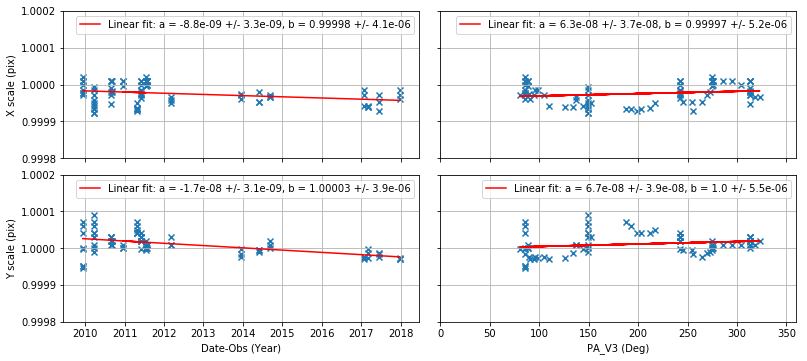

In [43]:
plt.clf()
fig, [(ax0, ax1), (ax2, ax3)] = plt.subplots(2, 2, figsize=(12, 6),sharex='col',sharey='row')
fig.tight_layout(pad=5, w_pad=0.5, h_pad=.625)
mark='x'
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

ymin, ymax = 0.9998,1.0002
#Gaia
#ymin, ymax = 0.9999,1.0001


#Plot 1------------------------------------------------------------------------------------------------
#Calculate linear fit
x = mdates.date2num(file_date_list)
print(x)
a = (x-x[0])
print(a)

slope,y_intercept,slope_err,y_intercept_err,polyfit_data=linear_fit(a,x_scale_list,1)

#Changing number of sigfigs for each value
slope=np.around(slope, decimals=10)
y_intercept=np.around(y_intercept, decimals=5)
slope_err=np.around(slope_err, decimals=10)
y_intercept_err=np.around(y_intercept_err, decimals=7)

#RMS calculation
#rms = np.sqrt(np.mean(polyfit_data**2))
#print(rms)
#rms=np.around(rms, decimals=5)

line_fit='Linear fit: a = {} +/- {}, b = {} +/- {}'.format(slope,slope_err,y_intercept,y_intercept_err)
ax0.scatter(file_date_list,x_scale_list,marker=mark)
ax0.yaxis.set_major_formatter(y_formatter)
ax0.plot(x,polyfit_data,'red',label=line_fit)
ax0.set_ylabel('X scale (pix)')
ax0.set_ylim([ymin, ymax])
ax0.grid()
ax0.legend()

##Plot 2------------------------------------------------------------------------------------------------
##Calculate linear fit
a=PA_V3_list-PA_V3_list[0]
slope,y_intercept,slope_err,y_intercept_err,polyfit_data=linear_fit(a,x_scale_list,1)

#Changing number of sigfigs for each value
slope=np.around(slope, decimals=9)
y_intercept=np.around(y_intercept, decimals=5)
slope_err=np.around(slope_err, decimals=9)
y_intercept_err=np.around(y_intercept_err, decimals=7)

##RMS calculation
#rms = np.sqrt(np.mean(polyfit_data**2))
#print(rms)
#rms=np.around(rms, decimals=5)

#ax1.set_xticks(np.arange(0, 370, 90.0))
line_fit='Linear fit: a = {} +/- {}, b = {} +/- {}'.format(slope,slope_err,y_intercept,y_intercept_err)
ax1.set_xlim([0,360])
ax1.scatter(PA_V3_list,x_scale_list,marker=mark)
ax1.yaxis.set_major_formatter(y_formatter)
ax1.plot(PA_V3_list,polyfit_data,'red',label=line_fit)
ax1.legend()
ax1.grid()

##Plot 3------------------------------------------------------------------------------------------------
##Calculate linear fit
a=x-x[0]
slope,y_intercept,slope_err,y_intercept_err,polyfit_data=linear_fit(a,y_scale_list,1)

#Changing number of sigfigs for each value
slope=np.around(slope, decimals=9)
y_intercept=np.around(y_intercept, decimals=5)
slope_err=np.around(slope_err, decimals=10)
y_intercept_err=np.around(y_intercept_err, decimals=7)

#RMS calculation
#rms = np.sqrt(np.mean(polyfit_data**2))
#print(rms)
#rms=np.around(rms, decimals=5)

line_fit='Linear fit: a = {} +/- {}, b = {} +/- {}'.format(slope,slope_err,y_intercept,y_intercept_err)
ax2.scatter(file_date_list,y_scale_list,marker=mark)
ax2.plot(file_date_list,polyfit_data,'red',label=line_fit)
ax2.yaxis.set_major_formatter(y_formatter)
ax2.set_ylim([ymin, ymax])
ax2.set_xlabel('Date-Obs (Year)')
ax2.set_ylabel('Y scale (pix)')
ax2.grid()
ax2.legend()

##Plot 4------------------------------------------------------------------------------------------------
##Calculate linear fit
a=PA_V3_list-PA_V3_list[0]
slope,y_intercept,slope_err,y_intercept_err,polyfit_data=linear_fit(a,y_scale_list,1)

#Changing number of sigfigs for each value
slope=np.around(slope, decimals=9)
y_intercept=np.around(y_intercept, decimals=5)
slope_err=np.around(slope_err, decimals=9)
y_intercept_err=np.around(y_intercept_err, decimals=7)


#RMS calculation
#rms = np.sqrt(np.mean(polyfit_data**2))
#print(rms)
#rms=np.around(rms, decimals=5)

line_fit='Linear fit: a = {} +/- {}, b = {} +/- {}'.format(slope,slope_err,y_intercept,y_intercept_err)
ax3.scatter(PA_V3_list,y_scale_list,marker=mark)
ax3.plot(PA_V3_list,polyfit_data,'red',label=line_fit)
ax3.yaxis.set_major_formatter(y_formatter)
ax3.set_xlabel('PA_V3 (Deg)')
#ax3.axhline(1,color='black')
ax3.grid()
ax3.legend(loc='upper right')
plt.savefig('xy_scale vs Date_obs & PA_V3 subplot.pdf')
plt.savefig('xy_scale vs Date_obs & PA_V3 subplot.png')
plt.show()
plt.clf()



# Skew vs Date_obs & PA_V3

ibcj01u3q_flt.fits
starting skew in postive deg: 360.0
converted skew to original degree 0.0
converted skew to arcsec 0.0
converted skew" to radians 0.0
tangent of the skew 0.0
tan(skew)*512 in arcsec 0.0

ibcj01u9q_flt.fits
starting skew in postive deg: 359.998
converted skew to original degree 0.0020000000000095497
converted skew to arcsec 7.200000000034379
converted skew" to radians 3.490660800016667e-05
tangent of the skew 3.49066079859891e-05
tan(skew)*512 in arcsec 0.01787218328882642

ibcj02dhq_flt.fits
starting skew in postive deg: 359.997
converted skew to original degree 0.002999999999985903
converted skew to arcsec 10.79999999994925
converted skew" to radians 5.235991199975395e-05
tangent of the skew 5.235991195190467e-05
tan(skew)*512 in arcsec 0.02680827491937519

ibcj02drq_flt.fits
starting skew in postive deg: 359.998
converted skew to original degree 0.0020000000000095497
converted skew to arcsec 7.200000000034379
converted skew" to radians 3.490660800016667e-05
tangent

converted skew to arcsec 14.807412000000001
converted skew" to radians 7.178840641368e-05
tangent of the skew 7.178840629035768e-05
tan(skew)*512 in arcsec 0.03675566402066313

idcm12b0q_flt.fits
starting skew in postive deg: 0.0045481
converted skew to original degree 0.0045481
converted skew to arcsec 16.373160000000002
converted skew" to radians 7.937937192240001e-05
tangent of the skew 7.937937175567462e-05
tan(skew)*512 in arcsec 0.04064223833890541

idcm16cpq_flt.fits
starting skew in postive deg: 0.000422605
converted skew to original degree 0.000422605
converted skew to arcsec 1.521378
converted skew" to radians 7.375853536919999e-06
tangent of the skew 7.375853536786242e-06
tan(skew)*512 in arcsec 0.003776437010834556

idcm17crq_flt.fits
starting skew in postive deg: 0.000597959
converted skew to original degree 0.000597959
converted skew to arcsec 2.1526524
converted skew" to radians 1.0436360206535999e-05
tangent of the skew 1.0436360206157097e-05
tan(skew)*512 in arcsec 0.0

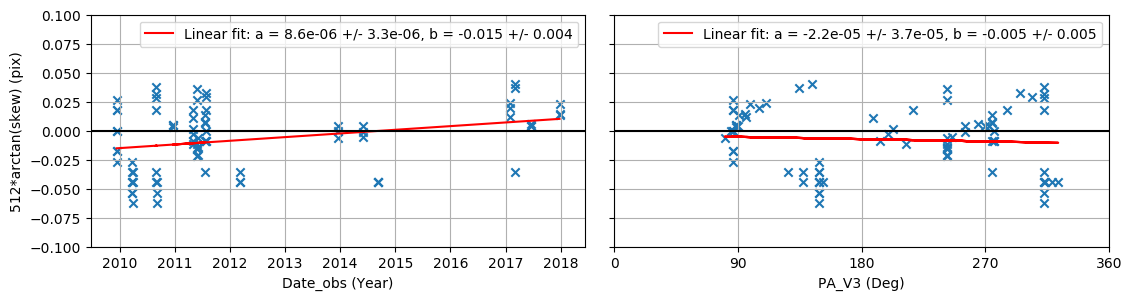

In [58]:
#os.chdir('./tweakreg_test12/')
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(12, 4),sharex='col',sharey='row')
fig.tight_layout(pad=5, w_pad=0.5, h_pad=.625)
marker='x'


x_arcsec_list = []
tan_skew_list=[]
#print(Skew_list)

dates = file_date_list
for skew,name in zip(Skew_list,filename_list):
    print(name)
    print ('starting skew in postive deg:',skew)
    if skew > 340.00:
        orig_x = 360.00 - skew
        #print(skew)
    elif skew > 0 and skew < 340:
        orig_x = skew
        #print(skew)
    elif skew < -20.00:
        orig_x = skew + 360.00
        orig_x = 0.0 - orig_x 
        #print(skew)
    elif skew < 0 and skew > -20:
        orig_x = skew
        #print(orig_x)
    print('converted skew to original degree',orig_x)
    x_arcsec = orig_x * 3600
    x_arcsec = float(x_arcsec)
    print('converted skew to arcsec',x_arcsec)
    skew_radians = x_arcsec*0.00000484814
    print('converted skew" to radians',skew_radians)
    tan_skew = np.arctan(skew_radians)
    print('tangent of the skew',(tan_skew))
    skew_512 = tan_skew * 512
    print('tan(skew)*512 in arcsec',skew_512)
    #tan_skew = tan_skew*0.00000484814
    x_arcsec_list.append(x_arcsec)
    tan_skew_list.append(skew_512)
    print("")

    
#Plot 1------------------------------------------------------------------------------------------------
#Calculate linear fit
x = mdates.date2num(file_date_list)
a=x-x[0]
slope,y_intercept,slope_err,y_intercept_err,polyfit_data=linear_fit(a,tan_skew_list,1)

#Changing number of sigfigs for each value
slope=np.around(slope, decimals=7)
y_intercept=np.around(y_intercept, decimals=3)
slope_err=np.around(slope_err, decimals=7)
y_intercept_err=np.around(y_intercept_err, decimals=3)

#ymin, ymax = -0.025,0.025
ymin, ymax = -0.1,0.1

line_fit='Linear fit: a = {} +/- {}, b = {} +/- {}'.format(slope,slope_err,y_intercept,y_intercept_err)
ax0.scatter(file_date_list,tan_skew_list,marker=mark)
ax0.yaxis.set_major_formatter(y_formatter)
ax0.plot(x,polyfit_data,'red',label=line_fit)
ax0.set_xlabel('Date_obs (Year)')
ax0.set_ylabel('512*arctan(skew) (pix)')
ax0.set_ylim([ymin, ymax])
ax0.axhline(0,color='black')
ax0.grid()
ax0.legend()

#Plot 2------------------------------------------------------------------------------------------------
#Calculate linear fit
a=PA_V3_list-PA_V3_list[0]
slope,y_intercept,slope_err,y_intercept_err,polyfit_data=linear_fit(a,tan_skew_list,1)

#Changing number of sigfigs for each value
slope=np.around(slope, decimals=6)
y_intercept=np.around(y_intercept, decimals=3)
slope_err=np.around(slope_err, decimals=6)
y_intercept_err=np.around(y_intercept_err, decimals=3)

#RMS calculation
#rms = np.sqrt(np.mean(polyfit_data**2))
#print(rms)
#rms=np.around(rms, decimals=5)
line_fit='Linear fit: a = {} +/- {}, b = {} +/- {}'.format(slope,slope_err,y_intercept,y_intercept_err)
ax1.scatter(PA_V3_list, tan_skew_list,marker=mark)
ax1.plot(PA_V3_list, polyfit_data, 'red',label=line_fit)
ax1.set_xlabel('PA_V3 (Deg)')
ax1.set_xticks(np.arange(0, 370, 90.0))
ax1.axhline(0,color='black')
ax1.grid()
ax1.legend()
plt.savefig('IR Skew vs Date_obs & PA_V3.png')
plt.savefig('IR Skew vs Date_obs & PA_V3.pdf')

plt.show()
plt.clf()



# X&Y RMS vs Date_Obs & PA_V3

slope=  5.4366325059360665e-06 y-intercept=  0.06955216541048415 slope_error=  3.6973636172767177e-07 y_intercept_error= 0.0004640351899706933
slope=  4.44488493991078e-06 y-intercept=  0.06396667840692956 slope_error=  7.723373891705125e-07 y_intercept_error= 0.0009693169625798947


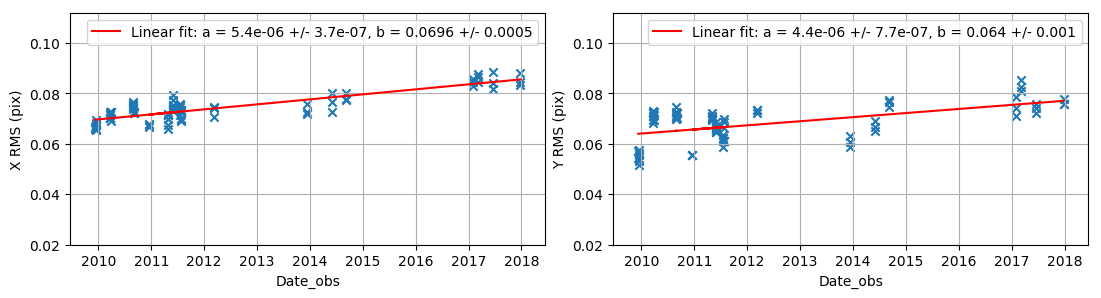

In [59]:
fig, [ax0,ax1] = plt.subplots(1, 2, figsize=(12, 4))
fig.tight_layout(pad=5, w_pad=1.8, h_pad=.625)
mark='x'

#Plot 1------------------------------------------------------------------------------------------------
#Calculate linear fit
a=x-x[0]
slope,y_intercept,slope_err,y_intercept_err,polyfit_data=linear_fit(a,x_rms_list,1)

#Changing number of sigfigs for each value
slope=np.around(slope, decimals=7)
y_intercept=np.around(y_intercept, decimals=4)
slope_err=np.around(slope_err, decimals=8)
y_intercept_err=np.around(y_intercept_err, decimals=4)

#ymin, ymax = 0.06,0.18
#Gaia 
ymin, ymax = 0.02,0.112

#Plot 1
line_fit='Linear fit: a = {} +/- {}, b = {} +/- {}'.format(slope,slope_err,y_intercept,y_intercept_err)      
ax0.scatter(file_date_list,x_rms_list,marker=mark)
ax0.plot(x, polyfit_data, 'red',label=line_fit)
ax0.set_xlabel('Date_obs')
ax0.set_ylabel('X RMS (pix)')
#ax0.set_ylim([0.02,0.12])
ax0.set_ylim([ymin, ymax])
#ax0.axhline(0.07,color='black')
ax0.grid()
ax0.legend()

#Plot 1------------------------------------------------------------------------------------------------
#Calculate linear fit
a=x-x[0]
slope,y_intercept,slope_err,y_intercept_err,polyfit_data=linear_fit(a,y_rms_list,1)

#Changing number of sigfigs for each value
slope=np.around(slope, decimals=7)
y_intercept=np.around(y_intercept, decimals=4)
slope_err=np.around(slope_err, decimals=8)
y_intercept_err=np.around(y_intercept_err, decimals=4)

#RMS calculation
#rms = np.sqrt(np.mean(polyfit_data**2))
#print(rms)
#rms=np.around(rms, decimals=5)

line_fit='Linear fit: a = {} +/- {}, b = {} +/- {}'.format(slope,slope_err,y_intercept,y_intercept_err)
ax1.scatter(file_date_list, y_rms_list,marker=mark)
ax1.plot(file_date_list, polyfit_data, 'red',label=line_fit)
ax1.set_xlabel('Date_obs')
ax1.set_ylabel('Y RMS (pix)')
#ax1.set_ylim([0.02,0.12])
ax1.set_ylim([ymin, ymax])
ax1.grid()
ax1.legend()

plt.savefig('X&Y RMS vs Date_obs and PA_V3.png')
plt.savefig('X&Y RMS vs Date_obs and PA_V3.pdf')
plt.show()
plt.clf()


# Plate Scale vs Date-Obs/PA_V3

slope=  -1.3027891407479727e-08 y-intercept=  1.000004856926266 slope_error=  2.020023990248443e-09 y_intercept_error= 2.5352178284014853e-06
slope=  5.969140679564098e-08 y-intercept=  0.9999867591249512 slope_error=  2.631735740899476e-08 y_intercept_error= 3.7238504801462783e-06


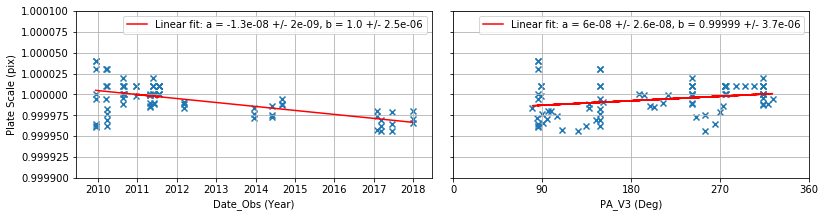

In [44]:
#os.chdir('./tweakreg_test12/')
plt.clf()
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(12, 4),sharex='col',sharey='row')
fig.tight_layout(pad=5, w_pad=0.5, h_pad=.625)
mark='x'
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

#Plot 1------------------------------------------------------------------------------------------------
#Calculate linear fit
a=x-x[0]
slope,y_intercept,slope_err,y_intercept_err,polyfit_data=linear_fit(a,plate_scale_list,1)

#Changing number of sigfigs for each value
slope=np.around(slope, decimals=9)
y_intercept=np.around(y_intercept, decimals=5)
slope_err=np.around(slope_err, decimals=10)
y_intercept_err=np.around(y_intercept_err, decimals=7)

#ymin, ymax = 1.414175,1.41426
#ymin, ymax = 1.4140,1.4144
ymin, ymax = 0.9999,1.0001

line_fit='Linear fit: a = {} +/- {}, b = {} +/- {}'.format(slope,slope_err,y_intercept,y_intercept_err)   
ax0.scatter(file_date_list,plate_scale_list,marker=mark)
ax0.yaxis.set_major_formatter(y_formatter)
ax0.plot(x, polyfit_data, 'red',label=line_fit)
#ax0.set_ylim([1.4142,1.4146])
ax0.set_ylim([ymin, ymax])
ax0.set_xlabel('Date_Obs (Year)')
ax0.set_ylabel('Plate Scale (pix)')
ax0.grid()
ax0.legend()


#Plot 2 -----------------------------------------------------------------------------

#Calculate linear fit
a=PA_V3_list-PA_V3_list[0]
slope,y_intercept,slope_err,y_intercept_err,polyfit_data=linear_fit(a,plate_scale_list,1)

#Changing number of sigfigs for each value
slope=np.around(slope, decimals=8)
y_intercept=np.around(y_intercept, decimals=5)
slope_err=np.around(slope_err, decimals=9)
y_intercept_err=np.around(y_intercept_err, decimals=7)


line_fit='Linear fit: a = {} +/- {}, b = {} +/- {}'.format(slope,slope_err,y_intercept,y_intercept_err)   
ax1.scatter(PA_V3_list, plate_scale_list,marker=mark)
ax1.plot(PA_V3_list, polyfit_data, 'red',label=line_fit)
ax1.set_xlabel('PA_V3 (Deg)')
ax1.set_xticks(np.arange(0, 370, 90.0))
plt.grid()
plt.legend()
plt.savefig('Plate Scale vs Date_obs & PA_V3.png')
plt.savefig('Plate Scale vs Date_obs & PA_V3.pdf')
plt.show()
plt.clf()


# Gaia Analysis

In [16]:
os.chdir('/Users/mmckay/Desktop/wfc3_ir_distortion/gaia_dr2_csv/')
gaia_dr2 = '1524680346517O-result.csv'
gaia_dr1 = 'OmegaCen.DR1.csv'
gaia_dr2_tbl = Table.read(gaia_dr2, format = "csv")
gaia_dr1_tbl = Table.read(gaia_dr1, format = "csv")

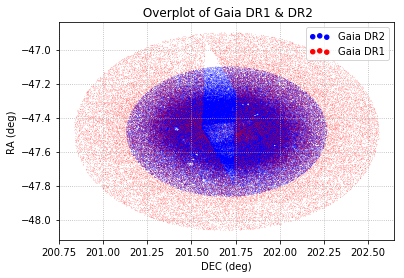

In [17]:
plt.clf()
#print(tbl1['ra'][1:])
gdr2_ra_val = gaia_dr2_tbl['ra']
gdr2_dec_val = gaia_dr2_tbl['dec']

gdr1_ra_val = gaia_dr1_tbl['ra']
gdr1_dec_val = gaia_dr1_tbl['dec']

plt.style.use('default')
plt.title(" Overplot of Gaia DR1 & DR2")
plt.scatter(gdr2_ra_val,gdr2_dec_val,s=.002,color='b',label='Gaia DR2',alpha=1)
plt.scatter(gdr1_ra_val,gdr1_dec_val,s=.002,color='r',label='Gaia DR1',alpha=1)
plt.xlabel('DEC (deg)')
plt.ylabel("RA (deg)")
plt.legend(markerscale=100.,scatterpoints=3)
plt.grid(ls = ':')
plt.savefig('Gaia_dr1_and_dr2.png')
plt.show()
plt.clf()

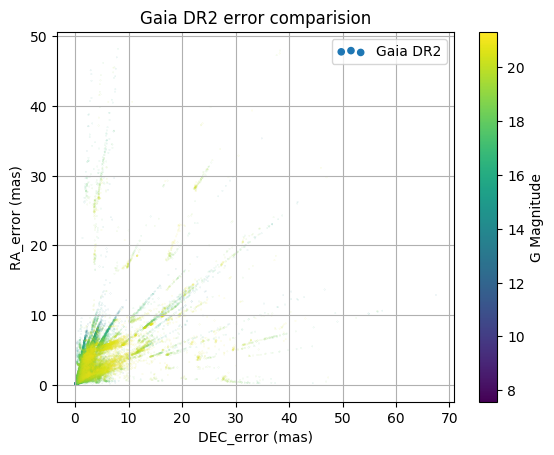

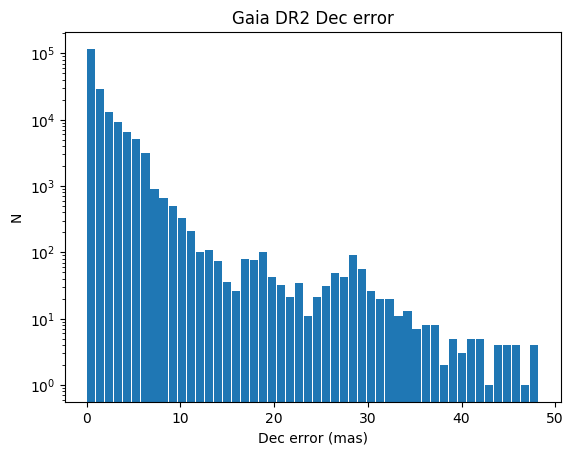

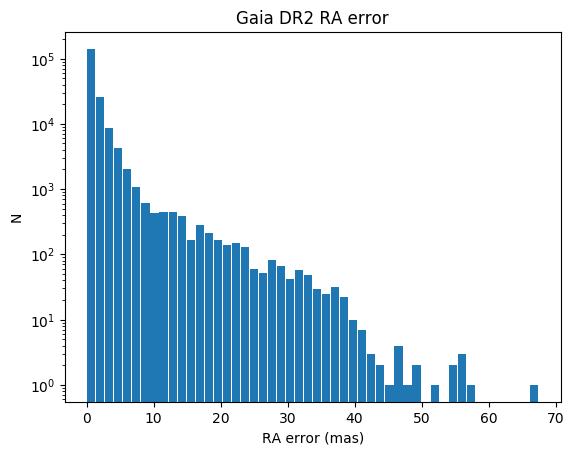

In [18]:
gdr2_ra_err = gaia_dr2_tbl['ra_error']
gdr2_dec_err = gaia_dr2_tbl['dec_error']

gdr1_ra_err = gaia_dr1_tbl['ra_error']
gdr1_dec_err = gaia_dr1_tbl['dec_error']

g_mags = gaia_dr2_tbl['phot_g_mean_mag']


plt.title("Gaia DR2 error comparision")
plt.scatter(gdr2_ra_err,gdr2_dec_err,s=.002,label='Gaia DR2',c=g_mags)
#plt.scatter(gdr1_ra_val,gdr1_dec_val,s=.002,color='r',label='Gaia DR1',alpha=1)
plt.xlabel('DEC_error (mas)')
plt.ylabel("RA_error (mas)")
plt.legend(markerscale=100.,scatterpoints=3)
plt.grid()
cb = plt.colorbar()
cb.set_label('G Magnitude')
plt.savefig('Gaia_DR2_ra_dec_error.png')
plt.show()
plt.clf()

plt.title("Gaia DR2 Dec error")
plt.hist(gdr2_dec_err,bins=50,rwidth=.9)
plt.xlabel('Dec error (mas)')
plt.ylabel('N')
plt.yscale('log')
plt.savefig('Gaia_DR2_dec_error_hist.png')
plt.show()
plt.clf()

plt.title("Gaia DR2 RA error")
plt.hist(gdr2_ra_err,bins=50,rwidth=.9)
plt.xlabel('RA error (mas)')
plt.ylabel('N')
plt.yscale('log')
plt.savefig('Gaia_DR2_ra_error_hist.png')
plt.show()
plt.clf()

In [19]:
t1 = Table()
t1['ra'] = gdr2_ra_val
t1['dec'] = gdr2_dec_val
t1.write('gaia_dr2.cat', format='ascii.fast_commented_header', overwrite=True)

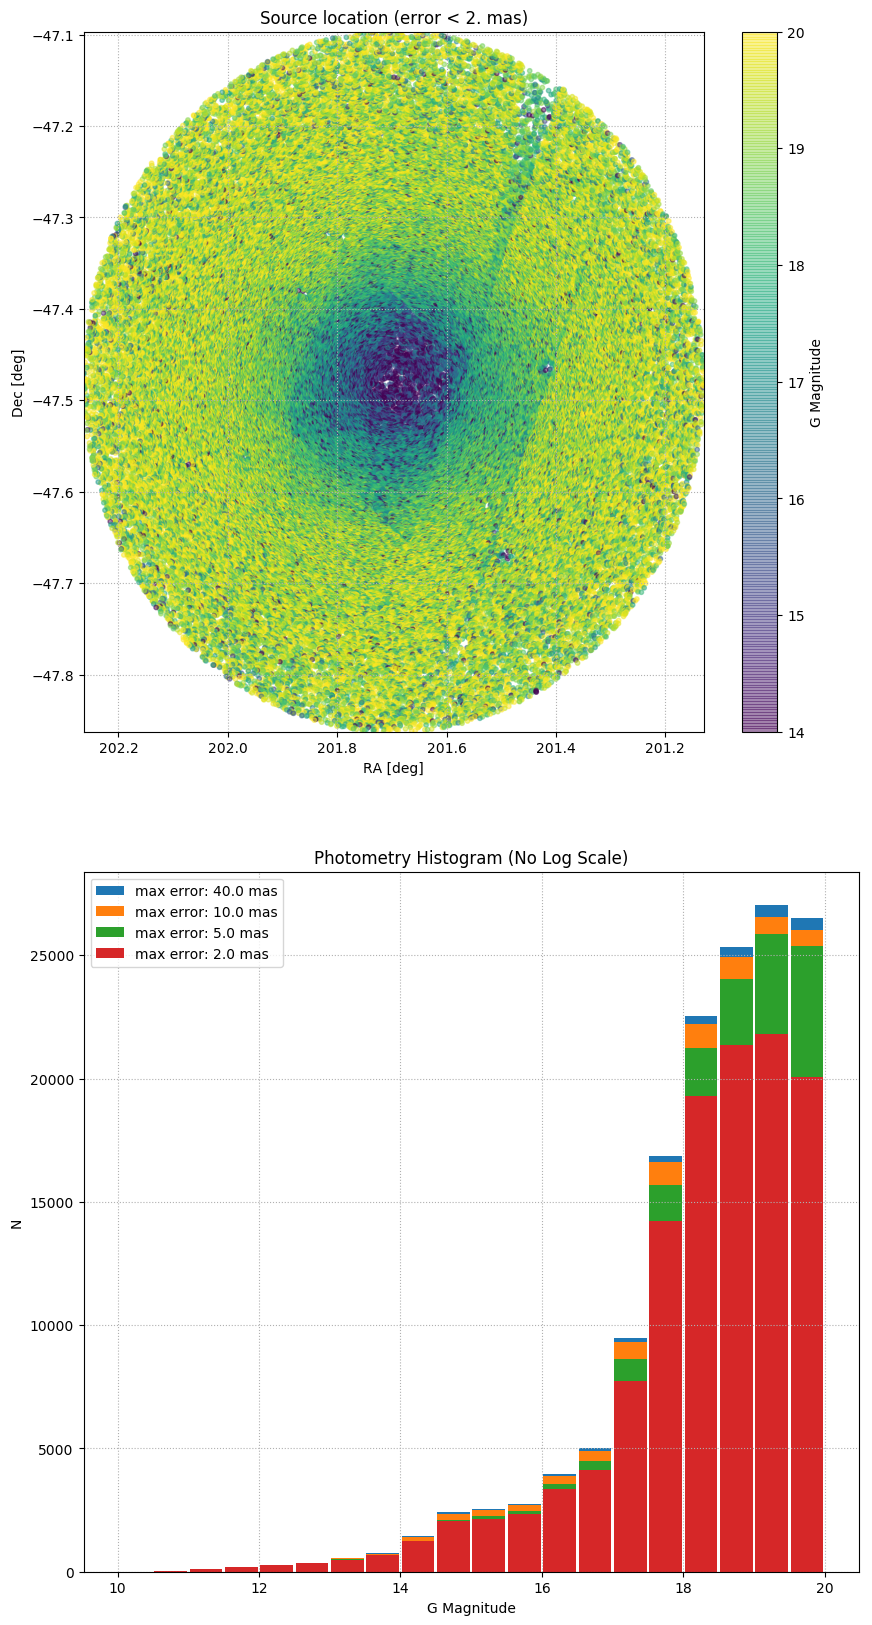

In [20]:
# Mask the sources

def get_error_mask(catalog, max_error):
    """Returns a mask for rows in catalog where RA and Dec error are less than max_error"""
    ra_mask = catalog['ra_error']< max_error
    dec_mask = catalog['dec_error'] < max_error
    mask = ra_mask & dec_mask
#     print('Cutting sources with error higher than {}'.format(max_error))
#     print('Number of sources befor filtering: {}\nAfter filtering: {}\n'.format(len(mask),sum(mask)))
    return mask

mask = get_error_mask(gaia_dr2_tbl, 2.)

# Plot RA/Dec Positions after clipping 

fig = plt.figure(figsize=[10,20])
ax1 = fig.add_subplot(211)
plt.scatter(gdr2_ra_val[mask],gdr2_dec_val[mask],c=g_mags[mask],alpha=.5,s=10,vmin=14,vmax=20)
ax1.set_xlim(max(gdr2_ra_val),min(gdr2_ra_val))
ax1.set_ylim(min(gdr2_dec_val),max(gdr2_dec_val))
ax1.grid(ls = ':')
ax1.set_xlabel('RA [deg]')
ax1.set_ylabel('Dec [deg]')
ax1.set_title('Source location (error < 2. mas)')
cb = plt.colorbar()
cb.set_label('G Magnitude')


ax2 = fig.add_subplot(212)
for err_threshold in [40., 10., 5., 2.]:
    mask = get_error_mask(gaia_dr2_tbl, err_threshold)
    hist, bins, patches = ax2.hist(g_mags[mask],bins=20,rwidth=.925,
                                   range=(10,20),label='max error: {} mas'.format(err_threshold))
ax2.grid(ls = ':')
ax2.set_xlabel('G Magnitude')
ax2.set_ylabel('N')
ax2.set_title('Photometry Histogram (No Log Scale)')
# ax2.set_yscale("log")
legend = ax2.legend(loc='best')
plt.savefig('location_less_than_2_mas_error.png')
plt.show()
plt.clf()

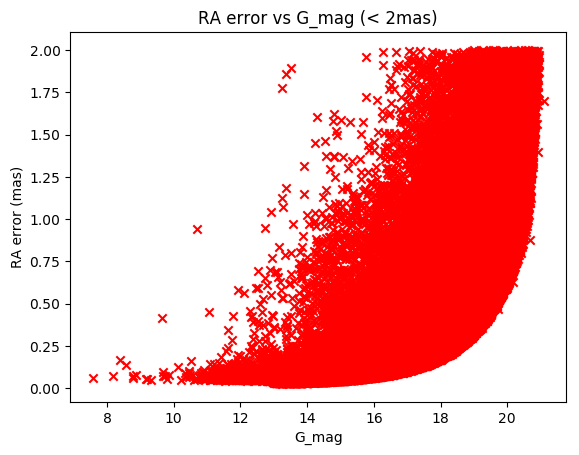

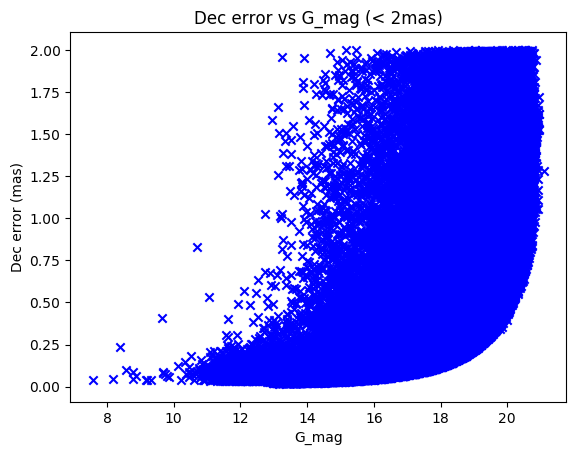

In [21]:
gdr2_ra_err = gaia_dr2_tbl['ra_error'] 
gdr2_dec_err = gaia_dr2_tbl['dec_error'] 


g_mags = gaia_dr2_tbl['phot_g_mean_mag'] 

mask = get_error_mask(gaia_dr2_tbl, 2.)

plt.title("RA error vs G_mag (< 2mas)")
plt.scatter(g_mags[mask], gdr2_ra_err[mask], marker='x',color='red')
#plt.hist(gdr2_ra_err,bins=50,rwidth=.9)
plt.ylabel('RA error (mas)')
plt.xlabel('G_mag')
#plt.yscale('log')
plt.savefig('Gaia_DR2_ra_error_2mas_hist.png')
plt.show()
plt.clf()

plt.title("Dec error vs G_mag (< 2mas)")
plt.scatter(g_mags[mask], gdr2_dec_err[mask], marker='x',color='blue')
#plt.hist(gdr2_dec_err,bins=50,rwidth=.9)
plt.ylabel('Dec error (mas)')
plt.xlabel('G_mag')
#plt.yscale('log')
plt.savefig('Gaia_DR2_dec_error_2mas_hist.png')
plt.show()
plt.clf()

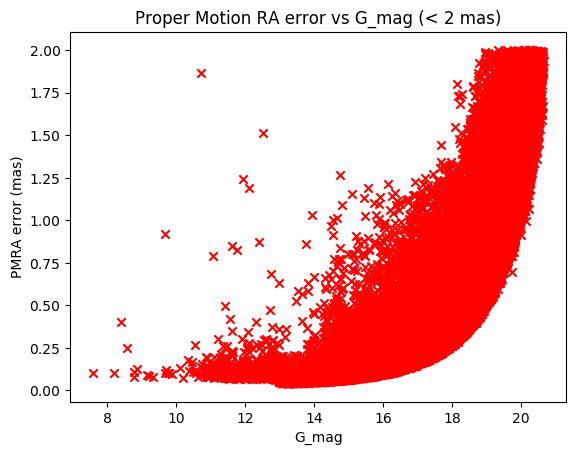

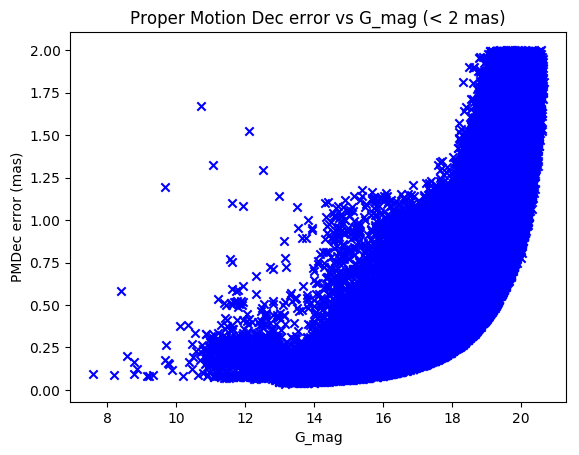

In [24]:
def pmerr_get_error_mask(catalog, max_error):
    """Returns a mask for rows in catalog where RA and Dec error are less than max_error"""
    pmra_mask = catalog['pmra_error']< max_error
    pmdec_mask = catalog['pmdec_error'] < max_error
    pmerr_mask = pmra_mask & pmdec_mask
#     print('Cutting sources with error higher than {}'.format(max_error))
#     print('Number of sources befor filtering: {}\nAfter filtering: {}\n'.format(len(mask),sum(mask)))
    return pmerr_mask


pmerr_mask = pmerr_get_error_mask(gaia_dr2_tbl,2.)

gdr2_pmra_err = gaia_dr2_tbl['pmra_error'] 
gdr2_pmdec_err = gaia_dr2_tbl['pmdec_error'] 
g_mags = gaia_dr2_tbl['phot_g_mean_mag'] 

plt.title("Proper Motion RA error vs G_mag (< 2 mas)")
plt.scatter(g_mags[pmerr_mask], gdr2_pmra_err[pmerr_mask], marker='x',color='red')
plt.ylabel('PMRA error (mas)')
plt.xlabel('G_mag')
#plt.yscale('log')
plt.savefig('Gaia_DR2_pmra_error_2mas_hist.png')
plt.show()
plt.clf()

plt.title("Proper Motion Dec error vs G_mag (< 2 mas)")
plt.scatter(g_mags[pmerr_mask], gdr2_pmdec_err[pmerr_mask], marker='x',color='blue')
plt.ylabel('PMDec error (mas)')
plt.xlabel('G_mag')
#plt.yscale('log')
plt.savefig('Gaia_DR2_pmdec_error_2mas_hist.png')
plt.show()
plt.clf()

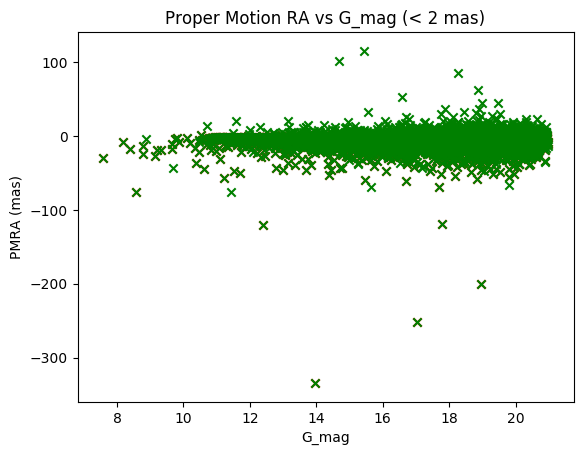

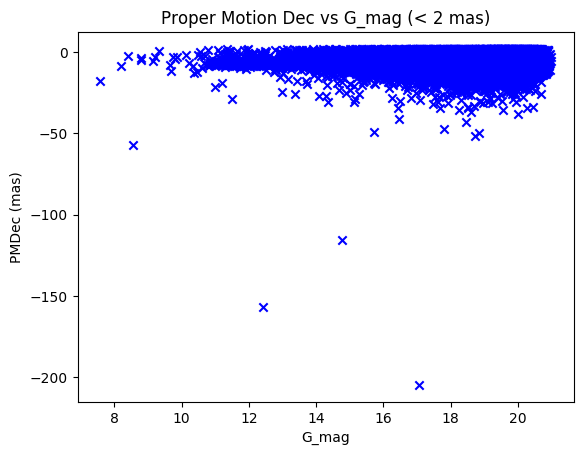

In [28]:
def pm_get_error_mask(catalog, max_error):
    """Returns a mask for rows in catalog where RA and Dec error are less than max_error"""
    pmra_mask = catalog['pmra']< max_error
    pmdec_mask = catalog['pmdec'] < max_error
    pm_mask = pmra_mask & pmdec_mask
#     print('Cutting sources with error higher than {}'.format(max_error))
#     print('Number of sources befor filtering: {}\nAfter filtering: {}\n'.format(len(mask),sum(mask)))
    return pm_mask


pm_mask = pm_get_error_mask(gaia_dr2_tbl,2.)

gdr2_pmra = gaia_dr2_tbl['pmra'] 
gdr2_pmdec = gaia_dr2_tbl['pmdec'] 
g_mags = gaia_dr2_tbl['phot_g_mean_mag'] 

plt.title("Proper Motion RA vs G_mag (< 2 mas)")
plt.scatter(g_mags[pm_mask], gdr2_pmra[pm_mask], marker='x',color='red')
plt.scatter(g_mags, gdr2_pmra, marker='x',color='green')

plt.ylabel('PMRA (mas)')
plt.xlabel('G_mag')
#plt.yscale('log')
plt.savefig('Gaia_DR2_pmra_error_2mas_hist.png')
plt.show()
plt.clf()

plt.title("Proper Motion Dec vs G_mag (< 2 mas)")
plt.scatter(g_mags[pm_mask], gdr2_pmdec[pm_mask], marker='x',color='blue')
plt.ylabel('PMDec (mas)')
plt.xlabel('G_mag')
#plt.yscale('log')
plt.savefig('Gaia_DR2_pmdec_error_2mas_hist.png')
plt.show()
plt.clf()

In [33]:
t1 = Table()
t1['ra'] = gdr2_ra_val[mask]
t1['dec'] = gdr2_dec_val[mask]
t1['mags'] = g_mags[mask]
t1.write('gaia_dr2_2mas_filter.cat', format='ascii.fast_commented_header', overwrite=True)
os.system('cp gaia_dr2.cat ../tweakreg_gaiaDR2_1/')

0

In [81]:
t1 = Table()
t1['ra'] = gdr2_ra_val
t1['dec'] = gdr2_dec_val
t1['mags'] = g_mags
t1.write('gaia_dr2.cat', format='ascii.fast_commented_header', overwrite=True)
os.system('cp gaia_dr2.cat ../tweakreg_gaiaDR2_1/')

256

In [44]:
gaia_dr2_2mas = Table.read('gaia_dr2_2mas_filter.cat', format = 'ascii.fast_commented_header')

ra = gaia_dr2_2mas['ra']
print(ra)




        ra        
------------------
201.69433880685176
 201.7003671973167
201.69298983772808
201.69827992405413
201.69931309830307
 201.6929633559524
 201.6921093450644
 201.7019880686349
201.69533823843022
  201.695972846602
               ...
202.03896045308772
201.60447749761684
 201.8819458061107
 201.4212908213107
201.75017654125986
 202.1955126759414
201.19367454646186
 201.1417866573324
201.28576303504462
 202.2480677472578
201.53906466013018
Length = 141086 rows


In [54]:
from astropy.time import Time
from astropy import units as u

#os.chdir('../tweakreg_gaiaDR2_1/')

def make_pm_corr_cat(cat, im, pmra, pmdec):
    expstart = fits.getval(im, 'expstart')
    t = Time(expstart, format='mjd')
    dt = t.decimalyear - 2015.5 # gaia epoch
    #print(u.yr, type(u.yr))
    corr_ra = cat['ra'] + pmra *dt / np.cos(cat['dec']*np.pi / 180.)
    # corr_ra = cat['ra'] + pmra * u.yr * dt
    corr_dec = cat['dec'] + pmdec * dt
    corr_tbl = Table([corr_ra, corr_dec])
    cut_filename = im.replace('.fits', '.cat')
    corr_tbl.write('promo_{}'.format(cut_filename), format='ascii.commented_header')     

    
gaia_dr2_2mas = Table.read('gaia_dr2_2mas_filter.cat', format = 'ascii.fast_commented_header')
images = glob.glob('*flt.fits')  
for im in images:
    make_pm_corr_cat(gaia_dr2_2mas, im, gdr2_pmra[mask], gdr2_pmdec[mask])
    
    
    
    

UnitsError: Can only apply 'add' function to dimensionless quantities when other argument is not a quantity (unless the latter is all zero/infinity/nan)

In [53]:
os.system('mkdir promo_stuff')
os.system('mv promo*.cat promo_stuff')

0

In [31]:
pwd

'/Users/mmckay/Desktop/wfc3_ir_distortion/gaia_dr2_csv'

In [70]:
# Option 3- Determine coordinates from data
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import wcsaxes

from matplotlib.patches import Polygon
import matplotlib.cm as cm
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy import units as u

# ----------------------------------------------------------------------------------------------------------

# 
def get_footprints(im_name):
    """Calculates positions of the corners of the science extensions of some image 'im_name' in sky space"""
    footprints = []
    hdu = fits.open(im_name)
    
    flt_flag = 'flt.fits' in im_name or 'flc.fits' in im_name
    
    # Loop ensures that each science extension in a file is accounted for.  This is important for 
    # multichip imagers like WFC3/UVIS and ACS/WFC
    for ext in hdu:
        if 'SCI' in ext.name:
            hdr = ext.header
            wcs = WCS(hdr, hdu)
            footprint = wcs.calc_footprint(hdr, undistort=flt_flag)
            footprints.append(footprint)
    
    hdu.close()
    return footprints

# ----------------------------------------------------------------------------------------------------------
def bounds(footprint_list):
    """Calculate RA/Dec bounding box properties from multiple RA/Dec points"""
    
    # flatten list of extensions into numpy array of all corner positions
    merged = [ext for image in footprint_list for ext in image]
    merged = np.vstack(merged)
    ras, decs = merged.T
    
    # Compute width/height
    delta_ra = (max(ras)-min(ras))
    delta_dec = max(decs)-min(decs)

    # Compute midpoints
    ra_midpt = (max(ras)+min(ras))/2.
    dec_midpt = (max(decs)+min(decs))/2.
    

    return ra_midpt, dec_midpt, delta_ra, delta_dec
# ----------------------------------------------------------------------------------------------------------

            
images = glob.glob('*flt.fits')
footprint_list = list(map(get_footprints, images))

# # If that's slow, here's a version that runs it in parallel:
# from multiprocessing import Pool
# p = Pool(8)
# footprint_list = list(p.map(get_footprints, images))
# p.close()
# p.join()


ra_midpt, dec_midpt, delta_ra, delta_dec = bounds(footprint_list)

coord = SkyCoord(ra=ra_midpt, dec=dec_midpt, unit=u.deg)
print(coord)

<SkyCoord (ICRS): (ra, dec) in deg
    (201.69631834, -47.47884509)>


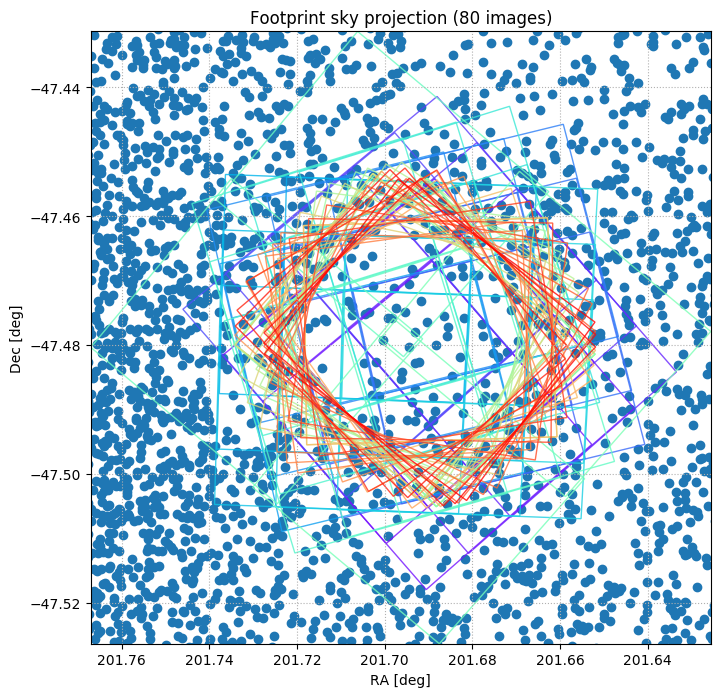

In [85]:
def plot_footprints(footprint_list, axes_obj=None, fill=True, catalog_ra='ra', catalog_dec='dec' ):
    """Plots the footprints of the images on sky space on axes specified by axes_obj """
    
    if axes_obj != None: 
        ax = axes_obj
    
    else: # If no axes passed in, initialize them now
        merged = [ext for image in footprint_list for ext in image] # flatten list of RA/Dec
        merged = np.vstack(merged)
        ras, decs = merged.T
        
        #Overplot DR2 locations
        
        
        
        # Calculate aspect ratio
        delta_ra = (max(ras)-min(ras))*np.cos(math.radians(min(np.abs(decs))))
        delta_dec = max(decs)-min(decs)
        aspect_ratio = delta_dec/delta_ra
    
        # Initialize axes
        fig = plt.figure(figsize=[8,8*aspect_ratio])
        ax = fig.add_subplot(111)
        ax.set_xlim([max(ras),min(ras)])
        ax.set_ylim([min(decs),max(decs)])
        ax.scatter(catalog_ra, catalog_dec)
       
        # Labels
        ax.set_xlabel('RA [deg]')
        ax.set_ylabel('Dec [deg]')
        ax.set_title('Footprint sky projection ({} images)'.format(len(footprint_list)))
        
        ax.grid(ls = ':')
    
        
    colors = cm.rainbow(np.linspace(0, 1, len(footprint_list)))
    alpha = 1./float(len(footprint_list)+1.)+.2
    
    if not fill:
        alpha =.8

    for i, image in enumerate(footprint_list): # Loop over images
        for ext in image: # Loop over extensions in images
            if isinstance(ax, wcsaxes.WCSAxes): # Check axes type
                rect = Polygon(ext, alpha=alpha, closed=True, fill=fill, 
                               color=colors[i], transform=ax.get_transform('icrs'))
            else:
                rect = Polygon(ext, alpha=alpha, closed=True, fill=fill, color=colors[i])

            ax.add_patch(rect)
    
    return ax

# ----------------------------------------------------------------------------------------------------------

plot_footprints(footprint_list, catalog_ra = gdr2_ra_val[mask] , catalog_dec = gdr2_dec_val[mask],fill=False)
plt.savefig('IR obs oveplot with Gaia DR2.png')
plt.show()



In [87]:
%run ../ir_residual_plotting.py --path='/Users/mmckay/Desktop/wfc3_ir_distortion/tweakreg_gaiaDR2_1/' --filter='F160W' --new_or_old_version=''



F160W


/Users/mmckay/miniconda3/envs/astroconda36/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W
F160W


# Other

ibcj01u3q_flt.fits
starting skew in postive deg: 360.0
converted skew to original degree 0.0
converted skew to arcsec 0.0
converted skew" to radians 0.0
tangent of the skew 0.0
tan(skew)*512 in arcsec 0.0

ibcj01u9q_flt.fits
starting skew in postive deg: 359.998
converted skew to original degree 0.0020000000000095497
converted skew to arcsec 7.200000000034379
converted skew" to radians 3.490660800016667e-05
tangent of the skew 3.49066079859891e-05
tan(skew)*512 in arcsec 0.01787218328882642

ibcj02dhq_flt.fits
starting skew in postive deg: 359.997
converted skew to original degree 0.002999999999985903
converted skew to arcsec 10.79999999994925
converted skew" to radians 5.235991199975395e-05
tangent of the skew 5.235991195190467e-05
tan(skew)*512 in arcsec 0.02680827491937519

ibcj02drq_flt.fits
starting skew in postive deg: 359.998
converted skew to original degree 0.0020000000000095497
converted skew to arcsec 7.200000000034379
converted skew" to radians 3.490660800016667e-05
tangent

converted skew to arcsec -2.4594587999999997
converted skew" to radians -1.1923800586631998e-05
tangent of the skew -1.1923800586066902e-05
tan(skew)*512 in arcsec -0.006104985900066254

ich810jnq_flt.fits
starting skew in postive deg: -0.000122299
converted skew to original degree -0.000122299
converted skew to arcsec -0.4402764
converted skew" to radians -2.134521625896e-06
tangent of the skew -2.1345216258927584e-06
tan(skew)*512 in arcsec -0.0010928750724570923

ich811jpq_flt.fits
starting skew in postive deg: 0.000409872
converted skew to original degree 0.000409872
converted skew to arcsec 1.4755391999999998
converted skew" to radians 7.153620617087998e-06
tangent of the skew 7.1536206169659714e-06
tan(skew)*512 in arcsec 0.0036626537558865774

ich812jlq_flt.fits
starting skew in postive deg: -0.000571313
converted skew to original degree -0.000571313
converted skew to arcsec -2.0567268000000003
converted skew" to radians -9.971299468152e-06
tangent of the skew -9.97129946782153e

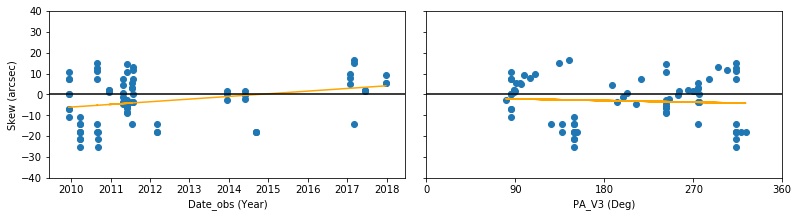

(array([ 8.64463484e-06, -1.52431682e-02]), array([0.05376487]), 2, array([1.30042502, 0.55578301]), 1.7541523789077473e-14)
8.644634843667889e-06 -0.0152431681598736 0.053764872646752226
0.01102155831788486
2014-09-06 00:00:00
(array([-2.17842875e-05, -5.26423617e-03]), array([0.05835805]), 2, array([1.34344294, 0.44177037]), 1.7541523789077473e-14)
-2.1784287549833693e-05 -0.005264236167668037 0.05835805257862702


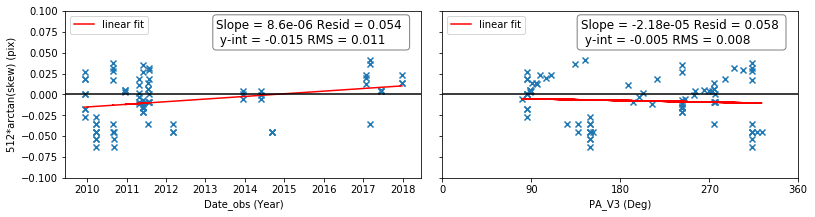

In [10]:
#os.chdir('./tweakreg_test12/')
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(12, 4),sharex='col',sharey='row')
fig.tight_layout(pad=5, w_pad=0.5, h_pad=.625)

#table = np.loadtxt('tweakreg_parameters.txt',usecols=(15,16,17,18,4))
#table1 = np.loadtxt('tweakreg_parameters.txt',usecols=(1),dtype='str')
#print(table1)
#print(table)
x_arcsec_list = []
tan_skew_list=[]
#print(Skew_list)

dates = file_date_list
for skew,name in zip(Skew_list,filename_list):
    print(name)
    print ('starting skew in postive deg:',skew)
    if skew > 340.00:
        orig_x = 360.00 - skew
        #print(skew)
    elif skew > 0 and skew < 340:
        orig_x = skew
        #print(skew)
    elif skew < -20.00:
        orig_x = skew + 360.00
        orig_x = 0.0 - orig_x 
        #print(skew)
    elif skew < 0 and skew > -20:
        orig_x = skew
        #print(orig_x)
    print('converted skew to original degree',orig_x)
    x_arcsec = orig_x * 3600
    x_arcsec = float(x_arcsec)
    print('converted skew to arcsec',x_arcsec)
    skew_radians = x_arcsec*0.00000484814
    print('converted skew" to radians',skew_radians)
    tan_skew = np.arctan(skew_radians)
    print('tangent of the skew',(tan_skew))
    skew_512 = tan_skew * 512
    print('tan(skew)*512 in arcsec',skew_512)
    #tan_skew = tan_skew*0.00000484814
    x_arcsec_list.append(x_arcsec)
    tan_skew_list.append(skew_512)
    print("")
    #print('tan(skew)',tan_skew)
    #print('skew converted to arcsec', x_arcsec)
    #print('')
    #x_arcsec_list.append(x_arcsec)
    #tan_skew_list.append(tan_skew)
#print(x)
#print(tan_skew_list)
ax0.scatter(file_date_list,x_arcsec_list)
polyfit=np.polyfit(x,x_arcsec_list,1)
polyfit_data=((polyfit[0]*x + polyfit[1]))
#print(polyfit_data)
#print(x)
#print('y1=',polyfit_data[0],'y2=', polyfit_data[-1])
#print('y20=',polyfit_data[20],'x20',x[20])
#print('x1=',x[0],'x2=', x[-1])
y1=polyfit_data[0]
y2=polyfit_data[-1]
x1=x[0]
x2=x[-1]
slope = (y2-y1)/(x2-x1)
print('Slope=',slope,'arcsec/Year')
b=-(slope*polyfit_data[20]) + x[20]
print(b)
ax0.plot(x, polyfit_data, 'orange')
ax0.set_xlabel('Date_obs (Year)')
ax0.set_ylabel('Skew (arcsec)')
ax0.set_ylim([-40,40])
ax0.axhline(0,color='black')

ax1.scatter(PA_V3_list, x_arcsec_list)
polyfit=np.polyfit(PA_V3_list,x_arcsec_list,1)
polyfit_data=((polyfit[0]*(PA_V3_list) + polyfit[1]))
ax1.plot(PA_V3_list, polyfit_data, 'orange')
ax1.set_xlabel('PA_V3 (Deg)')
ax1.set_xticks(np.arange(0, 370, 90.0))
ax1.axhline(0,color='black')
plt.savefig('IR Skew vs Date_obs & PA_V3')
plt.show()
plt.clf()


#-------------------------------------------------------------------------------------
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(12, 4),sharex='col',sharey='row')
fig.tight_layout(pad=5, w_pad=0.5, h_pad=.625)
mark='x'

#Calculate linear fit
a=x-x[0]
polyfit=np.polyfit(a,tan_skew_list,1,full=True)
print(polyfit)
#print(polyfit)
slope,y_int=np.split(polyfit[0],[1])
polyfit_resid=np.split(polyfit[1],[1])
slope,y_int,polyfit_resid=float(slope),float(y_int),float(polyfit_resid[0])
print(slope,y_int,polyfit_resid)
polyfit_data=((slope*a + y_int))
#polyfit_data=((polyfit[0]*a + polyfit[1])
slope=np.around(slope, decimals=7)
y_int=np.around(y_int, decimals=3)
polyfit_resid=np.around(polyfit_resid,decimals=3)

#Calculate slope and y-intercept
#y1=polyfit_data[0]
#y2=polyfit_data[-1]
#x1=x[0]
#x2=x[-1]
#slope = (y2-y1)/(x2-x1)
#slope=np.around(slope,decimals=7)
#print('Slope=',slope,'arcsec/Year')
#b=-(slope*x2) + y2
#print(b)
#b = np.around(b,decimals=3)

#RMS calculation
rms = np.sqrt(np.mean(polyfit_data**2))
print(rms)
rms=np.around(rms, decimals=3)


#Plot subplot 1
ax0.scatter(file_date_list,tan_skew_list,marker=mark)
ax0.plot(x, polyfit_data, 'red')
ax0.set_xlabel('Date_obs (Year)')
ax0.set_ylabel('512*arctan(skew) (pix)')
ax0.set_ylim([-0.1,0.1])
ax0.axhline(0,color='black')
ax0.legend(['linear fit'],loc='upper left')
print(file_date_list[66])
ax0.annotate(('Slope = {} Resid = {} \n y-int = {} RMS = {}'.format(slope,polyfit_resid,y_int,rms)),xy=(x[55]+400,0.091), xycoords='data',
            size=12, ha='left', va='top',
            bbox=dict(boxstyle='round', fc='w', alpha=0.5))


#Calculate linear fit
#polyfit=np.polyfit(PA_V3_list,tan_skew_list,1)
#polyfit_data=((polyfit[0]*(PA_V3_list) + polyfit[1]))

#Calculate linear fit
a=PA_V3_list-PA_V3_list[0]
polyfit=np.polyfit(a,tan_skew_list,1,full=True)
print(polyfit)
slope,y_int=np.split(polyfit[0],[1])
polyfit_resid=np.split(polyfit[1],[1])
slope,y_int,polyfit_resid=float(slope),float(y_int),float(polyfit_resid[0])
print(slope,y_int,polyfit_resid)
polyfit_data=((slope*a + y_int))
#polyfit_data=((polyfit[0]*a + polyfit[1])
slope=np.around(slope, decimals=7)
y_int=np.around(y_int, decimals=3)
polyfit_resid=np.around(polyfit_resid,decimals=3)
#polyfit_data=((polyfit[0]*a + polyfit[1]))
#slope=polyfit[0]
#y_int=polyfit[1]
#slope=np.around(slope, decimals=5)
#y_int=np.around(y_int, decimals=3)
#polyfit_resid=np.around(polyfit_resid,decimals=3)

#Calculate slope and y-intercept
#y1=polyfit_data[0]
#y2=polyfit_data[-1]
#x1=x[0]
#x2=x[-1]
#slope = (y2-y1)/(x2-x1)
#slope=np.around(slope,decimals=7)
##print('Slope=',slope,'arcsec/Year')
#b=-(slope*x2) + y2
##print(b)
#b = np.around(b,decimals=3)

#RMS calculation
rms = np.sqrt(np.mean(polyfit_data**2))
#print(rms)
rms=np.around(rms, decimals=3)

#Plot subplot 2
ax1.scatter(PA_V3_list, tan_skew_list,marker=mark)
ax1.plot(PA_V3_list, polyfit_data, 'red')
ax1.set_xlabel('PA_V3 (Deg)')
ax1.set_xticks(np.arange(0, 370, 90.0))
ax1.axhline(0,color='black')
ax1.legend(['linear fit'],loc='upper left')
ax1.annotate(('Slope = {} Resid = {} \n y-int = {} RMS = {}'.format(slope,polyfit_resid,y_int,rms)),xy=(140,0.091), xycoords='data',
            size=12, ha='left', va='top',
            bbox=dict(boxstyle='round', fc='w',alpha=0.5))
plt.savefig('Skew (pix) vs Date_obs & PA_V3')
plt.show()
plt.clf()
#print('filename, 512*tan_skew, date, PA_V3, skew(arcsec)')
#for i,j,k,roll,arcsec in zip(filename_list,tan_skew_list,file_date_list,PA_V3_list,x_arcsec_list):
#    if j > 0.10:
#        print(i,j,k,roll,arcsec)
#    elif j < -0.10:
#        print(i,j,k,roll,arcsec)

original skew 360.0
skew in radinas 6.283185307179586
arctan of skew 1.4129651365067377
original skew 359.998
skew in radinas 6.283150400594546
arctan of skew 1.4129642741515311
original skew 359.997
skew in radinas 6.283132947302027
arctan of skew 1.4129638429704234
original skew 359.998
skew in radinas 6.283150400594546
arctan of skew 1.4129642741515311
original skew -3.62258e-06
skew in radinas -6.322594841689618e-08
arctan of skew -6.32259484168961e-08
original skew -359.998
skew in radinas -6.283150400594546
arctan of skew -1.4129642741515311
original skew -359.997
skew in radinas -6.283132947302027
arctan of skew -1.4129638429704234
original skew -359.998
skew in radinas -6.283150400594546
arctan of skew -1.4129642741515311
original skew -359.995
skew in radinas -6.283098040716987
arctan of skew -1.4129629806011992
original skew -359.996
skew in radinas -6.283115494009507
arctan of skew -1.4129634117869794
original skew -359.997
skew in radinas -6.283132947302027
arctan of skew -

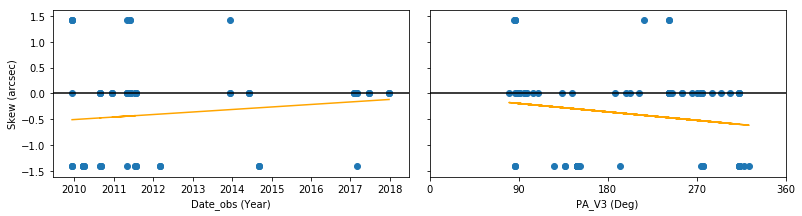

In [27]:
#os.chdir('./tweakreg_test12/')
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(12, 4),sharex='col',sharey='row')
fig.tight_layout(pad=5, w_pad=0.5, h_pad=.625)

skewlist_arctan=[]

for skew in Skew_list:
    skew_in_radians=np.deg2rad(skew)
    print('original skew',skew)
    print('skew in radinas', skew_in_radians)
    arctan_of_skew=np.arctan(skew_in_radians)
    print('arctan of skew', arctan_of_skew)
    skewlist_arctan.append(arctan_of_skew)

x1_value=file_date_list
x2_value=PA_V3_list
y_value=skewlist_arctan

ax0.scatter(x1_value,y_value)
polyfit=np.polyfit(x,y_value,1)
polyfit_data=((polyfit[0]*x + polyfit[1]))
y1=polyfit_data[0]
y2=polyfit_data[-1]
print('Slope=',slope,'arcsec/Year')
b=-(slope*polyfit_data[20]) + x[20]
print(b)
ax0.plot(x, polyfit_data, 'orange')
ax0.set_xlabel('Date_obs (Year)')
ax0.set_ylabel('Skew (arcsec)')
#ax0.set_ylim([-40,40])
ax0.axhline(0,color='black')



ax1.scatter(x2_value, y_value)
polyfit=np.polyfit(x2_value,y_value,1)
polyfit_data=((polyfit[0]*x2_value + polyfit[1]))
ax1.plot(x2_value, polyfit_data, 'orange')
ax1.set_xlabel('PA_V3 (Deg)')
ax1.set_xticks(np.arange(0, 370, 90.0))
ax1.axhline(0,color='black')
#plt.savefig('IR Skew vs Date_obs & PA_V3')
plt.show()
plt.clf()


#-------------------------------------------------------------------------------------
#fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(12, 4),sharex='col',sharey='row')
#fig.tight_layout(pad=5, w_pad=0.5, h_pad=.625)
#
#ax0.scatter(file_date_list,tan_skew_list)
#polyfit=np.polyfit(x,tan_skew_list,1)
#polyfit_data=((polyfit[0]*x + polyfit[1]))
##print(polyfit_data)
##print(x)
##print('y1=',polyfit_data[0],'y2=', polyfit_data[-1])
##print('y20=',polyfit_data[20],'x20',x[20])
##print('x1=',x[0],'x2=', x[-1])
#y1=polyfit_data[0]
#y2=polyfit_data[-1]
#x1=x[0]
#x2=x[-1]
#slope = (y2-y1)/(x2-x1)
#print('Slope=',slope,'arcsec/Year')
#b=-(slope*polyfit_data[20]) + x[20]
#print(b)
#ax0.plot(x, polyfit_data, 'orange')
#ax0.set_xlabel('Date_obs (Year)')
#ax0.set_ylabel('512*tan(skew) (pix)')
#ax0.set_ylim([-0.1,0.1])
#ax0.axhline(0,color='black')
#
#ax1.scatter(PA_V3_list, tan_skew_list)
#polyfit=np.polyfit(PA_V3_list,tan_skew_list,1)
#polyfit_data=((polyfit[0]*(PA_V3_list) + polyfit[1]))
#ax1.plot(PA_V3_list, polyfit_data, 'orange')
#ax1.set_xlabel('PA_V3 (Deg)')
#ax1.set_xticks(np.arange(0, 370, 90.0))
#ax1.axhline(0,color='black')
#plt.savefig('Skew (pix) vs Date_obs & PA_V3')
#plt.show()
#plt.clf()
#print('filename, 512*tan_skew, date, PA_V3, skew(arcsec)')
#for i,j,k,roll,arcsec in zip(filename_list,tan_skew_list,file_date_list,PA_V3_list,x_arcsec_list):
#    if j > 0.10:
#        print(i,j,k,roll,arcsec)
#    elif j < -0.10:
#        print(i,j,k,roll,arcsec)

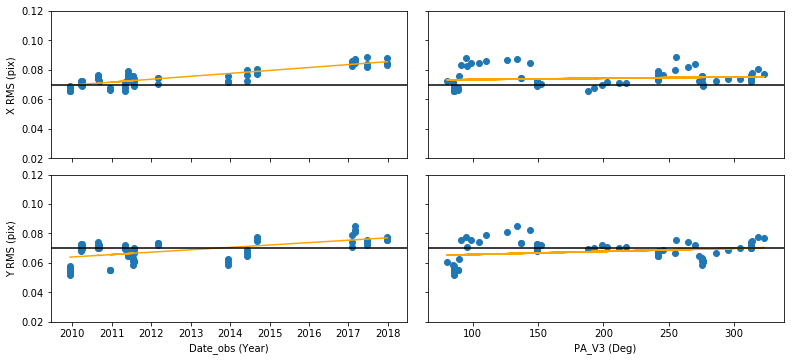

0.07426772151898733 0.0678220253164557 2720.215189873418


In [32]:
fig, [(ax0,ax1), (ax2,ax3)] = plt.subplots(2, 2, figsize=(12, 6),sharex='col',sharey='row')
fig.tight_layout(pad=5, w_pad=0.5, h_pad=.625)

ax0.scatter(file_date_list,x_rms_list)
polyfit=np.polyfit(x,x_rms_list,1)
polyfit_data=((polyfit[0]*x + polyfit[1]))
ax0.plot(x, polyfit_data, 'orange')
#ax0.axis((55000,58400,-50,50))
#plt.axis((55250,55300,-27,15))
#plt.axis((55170,55190,-27,15))
#plt.axis((55100,55900,-30,30))
#plt.axis((55275,55282,-30,30))
#ax0.set_xlabel('Date_obs')
ax0.set_ylabel('X RMS (pix)')
ax0.set_ylim([0.02,0.12])
#ax0.set_xlim(['01-01-2010','01-01-2013'])
ax0.axhline(0.07,color='black')

#plt.clf()
ax1.scatter(PA_V3_list, x_rms_list)
polyfit=np.polyfit(PA_V3_list,x_rms_list,1)
polyfit_data=((polyfit[0]*(PA_V3_list) + polyfit[1]))
ax1.plot(PA_V3_list, polyfit_data, 'orange')
ax1.axhline(0.07,color='black')
#plt.savefig('X&Y rms vs Date_obs & PA_V3')
#plt.show()
#plt.clf()

ax2.scatter(file_date_list,y_rms_list)
polyfit=np.polyfit(x,y_rms_list,1)
polyfit_data=((polyfit[0]*x + polyfit[1]))
ax2.plot(x, polyfit_data, 'orange')
ax2.set_ylim([0.02,0.12])
#ax0.axis((55000,58400,-50,50))
#plt.axis((55250,55300,-27,15))
#plt.axis((55170,55190,-27,15))
#plt.axis((55100,55900,-30,30))
#plt.axis((55275,55282,-30,30))
ax2.set_xlabel('Date_obs (Year)')
ax2.set_ylabel('Y RMS (pix)')
#ax0.set_ylim([-50,50])
ax2.axhline(0.07,color='black')

#plt.clf()
ax3.scatter(PA_V3_list, y_rms_list)
polyfit=np.polyfit(PA_V3_list,y_rms_list,1)
polyfit_data=((polyfit[0]*(PA_V3_list) + polyfit[1]))
ax3.plot(PA_V3_list, polyfit_data, 'orange')
ax3.set_xlabel('PA_V3 (Deg)')
ax3.axhline(0.07,color='black')
plt.savefig('X&Y rms vs Date_obs & PA_V3')
plt.show()
plt.clf()

average_xrms= np.mean(x_rms_list)
average_yrms= np.mean(y_rms_list)
average_stars= np.mean(stars_list)
print(average_xrms,average_yrms,average_stars)

(array([5.43663251e-06, 6.95521654e-02]), array([0.00066646]), 2, array([1.30042502, 0.55578301]), 1.7541523789077473e-14)
5.4366325059360665e-06 0.06955216541048415 0.0006664558172426275
0.07443127154177899
(array([4.44488494e-06, 6.39666784e-02]), array([0.00290805]), 2, array([1.30042502, 0.55578301]), 1.7541523789077473e-14)
4.44488493991078e-06 0.06396667840692956 0.002908045222048944
0.06794176435760775


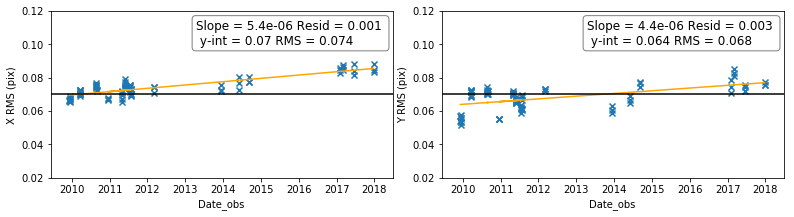

In [236]:
fig, [ax0,ax1] = plt.subplots(1, 2, figsize=(12, 4))
fig.tight_layout(pad=5, w_pad=1.8, h_pad=.625)
mark='x'

#Calculate linear fit
a=x-x[0]
polyfit=np.polyfit(a,x_rms_list,1,full=True)
print(polyfit)
#print(polyfit)
slope,y_int=np.split(polyfit[0],[1])
polyfit_resid=np.split(polyfit[1],[1])
slope,y_int,polyfit_resid=float(slope),float(y_int),float(polyfit_resid[0])
print(slope,y_int,polyfit_resid)
polyfit_data=((slope*a + y_int))
#polyfit_data=((polyfit[0]*a + polyfit[1])
slope=np.around(slope, decimals=7)
y_int=np.around(y_int, decimals=3)
polyfit_resid=np.around(polyfit_resid,decimals=3)

#RMS calculation
rms = np.sqrt(np.mean(polyfit_data**2))
print(rms)
rms=np.around(rms, decimals=3)

#Plot 1
ax0.scatter(file_date_list,x_rms_list,marker=mark)
#polyfit=np.polyfit(x,x_rms_list,1)
#polyfit_data=((polyfit[0]*x + polyfit[1]))
ax0.plot(x, polyfit_data, 'orange')
ax0.set_xlabel('Date_obs')
ax0.set_ylabel('X RMS (pix)')
ax0.set_ylim([0.02,0.12])
ax0.axhline(0.07,color='black')
ax0.annotate(('Slope = {} Resid = {} \n y-int = {} RMS = {}'.format(slope,polyfit_resid,y_int,rms)),xy=(x[55]+400,0.115), xycoords='data',
            size=12, ha='left', va='top',
            bbox=dict(boxstyle='round', fc='w', alpha=0.5))


#Calculate linear fit
a=x-x[0]
polyfit=np.polyfit(a,y_rms_list,1,full=True)
print(polyfit)
#print(polyfit)
slope,y_int=np.split(polyfit[0],[1])
polyfit_resid=np.split(polyfit[1],[1])
slope,y_int,polyfit_resid=float(slope),float(y_int),float(polyfit_resid[0])
print(slope,y_int,polyfit_resid)
polyfit_data=((slope*a + y_int))
#polyfit_data=((polyfit[0]*a + polyfit[1])
slope=np.around(slope, decimals=7)
y_int=np.around(y_int, decimals=3)
polyfit_resid=np.around(polyfit_resid,decimals=3)

#RMS calculation
rms = np.sqrt(np.mean(polyfit_data**2))
print(rms)
rms=np.around(rms, decimals=3)

#Plot 2
ax1.scatter(file_date_list, y_rms_list,marker=mark)
#polyfit=np.polyfit(x,y_rms_list,1)
#polyfit_data=((polyfit[0]*x + polyfit[1]))
ax1.plot(file_date_list, polyfit_data, 'orange')
ax1.set_xlabel('Date_obs')
ax1.set_ylabel('Y RMS (pix)')
ax1.set_ylim([0.02,0.12])
ax1.axhline(0.07,color='black')
ax1.annotate(('Slope = {} Resid = {} \n y-int = {} RMS = {}'.format(slope,polyfit_resid,y_int,rms)),xy=(x[55]+400,0.115), xycoords='data',
            size=12, ha='left', va='top',
            bbox=dict(boxstyle='round', fc='w', alpha=0.5))
#plt.savefig('X&Y rms vs Date_obs & PA_V3')
plt.show()
plt.clf()


(array([-1.81530549e-08,  1.41422002e+00]), array([4.08486205e-08]), 2, array([1.30042502, 0.55578301]), 1.7541523789077473e-14)
-1.8153054904771813e-08 1.4142200173885642 4.084862050035556e-08
1.4142042721220465
(array([2.11236892e-05, 6.54163960e-02]), array([0.00394369]), 2, array([1.34344294, 0.44177037]), 1.7541523789077473e-14)
2.112368918797677e-05 0.06541639601049402 0.003943688772339948
0.06784522040641994


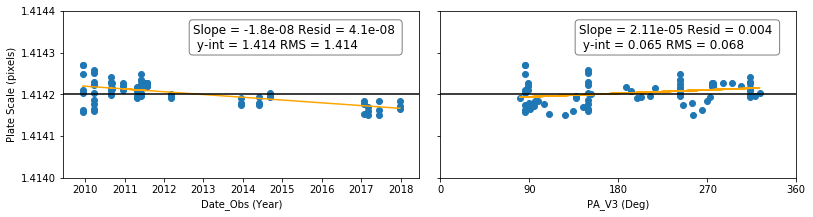

In [346]:
#os.chdir('./tweakreg_test12/')
plt.clf()
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(12, 4),sharex='col',sharey='row')
fig.tight_layout(pad=5, w_pad=0.5, h_pad=.625)
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

#Plot 1 -----------------------------------------------------------------------------
#Calculate linear fit
a=x-x[0]
polyfit=np.polyfit(a,plate_scale_list,1,full=True)
print(polyfit)
#print(polyfit)
slope,y_int=np.split(polyfit[0],[1])
polyfit_resid=np.split(polyfit[1],[1])
slope,y_int,polyfit_resid=float(slope),float(y_int),float(polyfit_resid[0])
print(slope,y_int,polyfit_resid)
polyfit_data=((slope*a + y_int))
#polyfit_data=((polyfit[0]*a + polyfit[1])
slope=np.around(slope, decimals=9)
y_int=np.around(y_int, decimals=3)
polyfit_resid=np.around(polyfit_resid,decimals=9)

#RMS calculation
rms = np.sqrt(np.mean(polyfit_data**2))
print(rms)
rms=np.around(rms, decimals=3)

   
ax0.scatter(file_date_list,plate_scale_list)
ax0.yaxis.set_major_formatter(y_formatter)
polyfit=np.polyfit(x,plate_scale_list,1)
polyfit_data=((polyfit[0]*x + polyfit[1]))
ax0.plot(x, polyfit_data, 'orange')
ax0.set_ylim([1.414,1.4144])
#ax0.set_xlim(['01-01-2010','12-31-2013'])
ax0.set_xlabel('Date_Obs (Year)')
ax0.set_ylabel('Plate Scale (pixels)')
ax0.axhline(1.4142,color='black')
ax0.annotate(('Slope = {} Resid = {} \n y-int = {} RMS = {}'.format(slope,polyfit_resid,y_int,rms)),xy=(x[55]+200,1.41437), xycoords='data',
            size=12, ha='left', va='top',
            bbox=dict(boxstyle='round', fc='w', alpha=0.5))

#Plot 2 -----------------------------------------------------------------------------

#Calculate linear fit
a=PA_V3_list-PA_V3_list[0]
polyfit=np.polyfit(a,y_rms_list,1,full=True)
print(polyfit)
#print(polyfit)
slope,y_int=np.split(polyfit[0],[1])
polyfit_resid=np.split(polyfit[1],[1])
slope,y_int,polyfit_resid=float(slope),float(y_int),float(polyfit_resid[0])
print(slope,y_int,polyfit_resid)
polyfit_data=((slope*a + y_int))
#polyfit_data=((polyfit[0]*a + polyfit[1])
slope=np.around(slope, decimals=7)
y_int=np.around(y_int, decimals=3)
polyfit_resid=np.around(polyfit_resid,decimals=3)

#RMS calculation
rms = np.sqrt(np.mean(polyfit_data**2))
print(rms)
rms=np.around(rms, decimals=3)

ax1.scatter(PA_V3_list, plate_scale_list)
polyfit=np.polyfit(PA_V3_list,plate_scale_list,1)
polyfit_data=((polyfit[0]*(PA_V3_list) + polyfit[1]))
ax1.plot(PA_V3_list, polyfit_data, 'orange')
ax1.set_xlabel('PA_V3 (Deg)')
ax1.set_xticks(np.arange(0, 370, 90.0))
ax1.axhline(1.4142,color='black')
ax1.annotate(('Slope = {} Resid = {} \n y-int = {} RMS = {}'.format(slope,polyfit_resid,y_int,rms)),xy=(140,1.41437), xycoords='data',
            size=12, ha='left', va='top',
            bbox=dict(boxstyle='round', fc='w',alpha=0.5))
plt.savefig('Plate Scale vs Date_obs & PA_V3')
plt.show()
plt.clf()


#dates = file_date_list
##print(dates)
##print(date_obs_list)
##print(PAV3_list)
##print(x_rot_list)
##print(x)
##plt.scatter(expstart_list[:27],x_arcsec_list[:27])
##plt.plot(expstart_list[:27],x_arcsec_list[:27])
#ax0.scatter(file_date_list,x_arcsec_list)
#polyfit=np.polyfit(x,x_arcsec_list,1)
#polyfit_data=((polyfit[0]*x + polyfit[1]))
#ax0.plot(x, polyfit_data, 'orange')
##ax0.axis((55000,58400,-50,50))
##plt.axis((55250,55300,-27,15))
##plt.axis((55170,55190,-27,15))
##plt.axis((55100,55900,-30,30))
##plt.axis((55275,55282,-30,30))
#ax0.set_xlabel('Date_obs (Year)')
#ax0.set_ylabel('Skew (arcsec)')
#ax0.set_ylim([-50,50])
#ax0.axhline(0,color='black')
#
##plt.clf()
#ax1.scatter(PAV3_list, x_arcsec_list)
#polyfit=np.polyfit(PAV3_list,x_arcsec_list,1)
#polyfit_data=((polyfit[0]*(PAV3_list) + polyfit[1]))
#ax1.plot(PAV3_list, polyfit_data, 'orange')
#ax1.set_xlabel('PA_V3 (Deg)')
#ax1.axhline(0,color='black')
#plt.savefig('IR Skew vs Date_obs & PA_V3')
#plt.show()
#plt.clf()

# X&Y rotation vs. Year/PA_V3

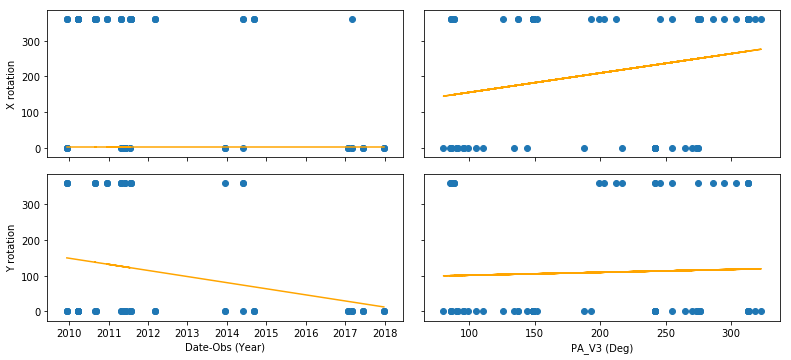

In [46]:
fig, [(ax0, ax2), (ax1, ax3)] = plt.subplots(2, 2, figsize=(12, 6),sharex='col',sharey='row')
fig.tight_layout(pad=5, w_pad=0.5, h_pad=.625)
xscale_by_VA_factor = x_scale_list*va_factor_list
#print(xscale_by_VA_factor)
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#ax.yaxis.set_major_formatter(y_formatter)

ax0.scatter(file_date_list,x_rotation_list)
ax0.yaxis.set_major_formatter(y_formatter)
xrot_polyfit=np.polyfit(x,x_rotation_list,1)
xrot_polyfit_data=((xrot_polyfit[0]*x + xrot_polyfit[1]))
xrot_pd = ((xrot_polyfit_data[0] - xrot_polyfit_data[-1])/ xrot_polyfit_data[-1]) * 100
ax0.plot(x,xscale_polyfit_data,'orange')
ax0.set_ylabel('X rotation')
#ax0.set_ylim([0.9998,1.0002])


ax1.scatter(file_date_list,y_rotation_list)
ax1.yaxis.set_major_formatter(y_formatter)
yrot_list_polyfit=np.polyfit(x,y_rotation_list,1)
yrot_list_polyfit_data=((yrot_list_polyfit[0]*x + yrot_list_polyfit[1]))
yrot_list_pd = ((yrot_list_polyfit_data[0] - yrot_list_polyfit_data[-1])/ yrot_list_polyfit_data[-1]) * 100
ax1.plot(x,yrot_list_polyfit_data,'orange')
ax1.set_ylabel('Y rotation')
ax1.set_xlabel('Date-Obs (Year)')
#ax1.set_ylim([0.9998,1.0002])

ax2.scatter(PA_V3_list,x_rotation_list)
xrot_polyfit=np.polyfit(PA_V3_list,x_rotation_list,1)
xrot_polyfit_data=((xrot_polyfit[0]*PA_V3_list + xrot_polyfit[1]))
xrot_pd = ((xrot_polyfit_data[0] - xrot_polyfit_data[-1])/ xrot_polyfit_data[-1]) * 100
ax2.plot(PA_V3_list,xrot_polyfit_data,'orange')

ax3.scatter(PA_V3_list,y_rotation_list)
ax3.set_xlabel('PA_V3 (Deg)')
yrot_list_polyfit=np.polyfit(PA_V3_list,y_rotation_list,1)
yrot_list_polyfit_data=((yrot_list_polyfit[0]*PA_V3_list + yrot_list_polyfit[1]))
yrot_list_pd = ((yrot_list_polyfit_data[0] - yrot_list_polyfit_data[-1])/ yrot_list_polyfit_data[-1]) * 100      
ax3.plot(PA_V3_list,yrot_list_polyfit_data,'orange')
plt.savefig('xy_rotation subplot.png')
plt.show()
plt.clf()


In [47]:
os.chdir('/Users/mmckay/Desktop/wfc3_ir_distortion/tweakreg_test11/')
infile = r"tweakreg.log"


ROT_X = []
ROT_Y = []
#keep_phrases = ["ROT_X","ROT_Y"]
#keep_phrases = ["<ROT>","Computed  general  fit "]
keep_phrases = ["<ROT>"]
with open(infile) as f:
    f = f.readlines()

for line in f:
    for phrase in keep_phrases:
        if phrase in line:
            #print(line)
            X_Rot=line.split()[7]
            X_Rot=X_Rot.replace(':','')
            X_Rot=X_Rot.replace('\n','')
            print(X_Rot)
            ROT_X.append(X_Rot)
            Y_Rot=line.split()[9]
            Y_Rot=Y_Rot.replace(':','')
            Y_Rot=Y_Rot.replace('\n','')
            print(Y_Rot)
            ROT_Y.append(Y_Rot)
            #lines.append(line)
            break

t1=Table()
t1['X_Rotation'] = ROT_X
t1['Y_Rotation'] = ROT_Y
t1.write('Rotation_parameters.txt',format='ascii.fixed_width', overwrite=True)




#
#cleanLines = []
#with open("Rotation_parameters.txt", "r") as file:
#    for line in file:
#        cleanedLine = line.strip()
#        cleanedLine = cleanedLine.replace('Line', '')
#        cleanedLine = cleanedLine.replace('||', '')
#        cleanedLine = cleanedLine.replace('  ROT_Y', '      ROT_Y')
#        #if cleanedLine = ''
#        #cleanedLine = cleanedLine.strip('') 
#        print(cleanedLine)
#        cleanLines.append(cleanedLine)
#        #print(cleanedLine)
#        #if cleanedLine: # is not empty
#            #print(cleanedLine)
##print(cleanLines) 
#
#t2=Table()
#t2['Log File Info'] = cleanLines
#t2['Log File Info'].format = '<'
#t2.pprint(align=['<'])
#t2.write('New_Rotation_parameters.txt',format='ascii.fixed_width', overwrite=True)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mmckay/Desktop/wfc3_ir_distortion/tweakreg_test11/'

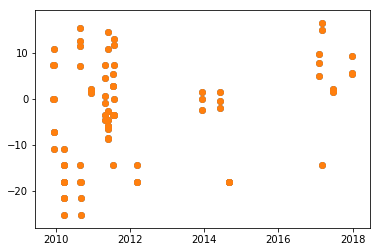

In [160]:
plt.scatter(decimal_date_list,x_arcsec_list)
plt.show()
